In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv
/kaggle/input/new-york-city-taxi-fare-prediction/GCP-Coupons-Instructions.rtf
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv
/kaggle/input/mapnyc-png/map.png
/kaggle/input/coords/Data Coordinates.csv
/kaggle/input/sample-training-data/sampled_train_data.csv
/kaggle/input/sample-training-data/pickup_heatmap.html
/kaggle/input/sample-training-data/dataset.csv
/kaggle/input/final-data/Data Coordinates.xlsx
/kaggle/input/final-data/Final Final Dataset.csv


In [2]:
pip install basemap

  Obtaining dependency information for basemap from https://files.pythonhosted.org/packages/13/c8/b10d328a626d8cbb5d64f56aa7dde148c302f44cd1dd75f2af900f80478c/basemap-1.3.8-cp310-cp310-manylinux1_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 44.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas_market_calendars


  Obtaining dependency information for pandas_market_calendars from https://files.pythonhosted.org/packages/a2/5b/cf6a60c05b04146d137544cc0b15a955ca4ddc23e1a0642285da18bdc621/pandas_market_calendars-4.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for exchange-calendars>=3.3 from https://files.pythonhosted.org/packages/79/a8/d7e75932a97e253dd300bb94533af230788f71443353c48c85032f256870/exchange_calendars-4.5-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 8.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install --upgrade scipy

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/e0/9e/80e2205d138960a49caea391f3710600895dd8292b6868dc9aff7aa593f9/scipy-1.11.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 29.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.3
    Uninstalling scipy-1.11.3:
      Successfully uninstalled scipy-1.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
p

In [5]:
#Load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import folium
from folium.plugins import HeatMap
import geopandas as gpd
from shapely.geometry import Point
from folium.plugins import MarkerCluster
import datetime
from pandas_market_calendars import get_calendar
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point
import contextily as ctx
from scipy.cluster.vq import kmeans
from sklearn.cluster import KMeans
import matplotlib.image as mpimg
from IPython.display import HTML
import math
from math import cos, asin, sqrt, radians
import holidays
import calendar
from IPython.display import IFrame


In [6]:
"""
#Upload the dataset
train_data = pd.read_csv('/kaggle/input/sample-training-data/sampled_train_data.csv')
train_data = train_data.sample(n=500_000, random_state=42)
train_data.head()
"""

"\n#Upload the dataset\ntrain_data = pd.read_csv('/kaggle/input/sample-training-data/sampled_train_data.csv')\ntrain_data = train_data.sample(n=500_000, random_state=42)\ntrain_data.head()\n"

In [7]:
"""
# Save the sampled dataset to a CSV file
train_data.to_csv('/kaggle/working/sampled_train_data.csv', index=False)
"""

"\n# Save the sampled dataset to a CSV file\ntrain_data.to_csv('/kaggle/working/sampled_train_data.csv', index=False)\n"

In [8]:
"""
train_data = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/train.csv')
"""

"\ntrain_data = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/train.csv')\n"

In [9]:

train_data = pd.read_csv('/kaggle/input/sample-training-data/sampled_train_data.csv')
train_data.head()


key  fare_amount          pickup_datetime  \
0  2014-07-23 14:30:00.000000188        36.83  2014-07-23 14:30:00 UTC   
1   2011-07-09 23:01:00.00000034         6.50  2011-07-09 23:01:00 UTC   
2   2013-08-18 19:47:00.00000016         4.00  2013-08-18 19:47:00 UTC   
3    2014-04-28 14:25:05.0000004         6.00  2014-04-28 14:25:05 UTC   
4  2012-01-27 16:00:00.000000111         6.10  2012-01-27 16:00:00 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.987142        40.743967         -73.861902         40.768452   
1        -74.002037        40.726323         -74.008382         40.740513   
2        -73.974415        40.746542         -73.980770         40.737802   
3        -73.863084        40.769682         -73.863084         40.769682   
4        -74.008477        40.720858         -74.002013         40.740358   

   passenger_count  
0                6  
1                5  
2                5  
3                1  
4                1

In [10]:
"""
#Gather information about the dataset
train_data.info()
train_data.describe()
train_data.shape
"""

'\n#Gather information about the dataset\ntrain_data.info()\ntrain_data.describe()\ntrain_data.shape\n'

**Data Preprocessing**

In [11]:

#Earth does not have a striaght line distance. It's curve in its nature. Therefore, we use the Haversine Formula to calculate the distances
def sin_sq_half_angle(r):
    return (1 - cos(r)) / 2

def haversine_formula(d_lat, p_lat, d_lon, p_lon):
    earth_radius = 6371 #km
    
    # Application of the Haversine formula using
    # https://en.wikipedia.org/wiki/Haversine_formula
    # Calculating for d
    
    a = sin_sq_half_angle(d_lat - p_lat) + (cos(p_lat) * cos(d_lat) * sin_sq_half_angle(d_lon - p_lon))
    return earth_radius * 2 * asin(sqrt(a))

def haversine_distance(row):
    p_lon = radians(row['pickup_longitude'])
    d_lon = radians(row['dropoff_longitude'])
    p_lat = radians(row['pickup_latitude'])
    d_lat = radians(row['dropoff_latitude'])
    return haversine_formula(d_lat, p_lat, d_lon, p_lon)


In [12]:

# define bounding box
BB = (-75, -73, 40, 41.5)

# this function will be used with the test set below
def select_within_boundingbox(train_data, BB):
    return (train_data.pickup_longitude >= BB[0]) & (train_data.pickup_longitude <= BB[1]) & \
           (train_data.pickup_latitude >= BB[2]) & (train_data.pickup_latitude <= BB[3]) & \
           (train_data.dropoff_longitude >= BB[0]) & (train_data.dropoff_longitude <= BB[1]) & \
           (train_data.dropoff_latitude >= BB[2]) & (train_data.dropoff_latitude <= BB[3])

def process_data(filename, num_rows=100):
    train_data = pd.read_csv(filename, nrows=num_rows, parse_dates=["pickup_datetime"]).dropna()
    train_data = train_data[select_within_boundingbox(train_data, BB)]
    
    # Filter any negative fare amounts or anything huge ( > $200 USD)
    train_data = train_data[(train_data.fare_amount > 0) & (train_data.fare_amount < 200) ]
    
    #Filter journeys with no passengers
    train_data = train_data[train_data.passenger_count > 0]
    
    #Remove missing data
    train_data = train_data.dropna()


    distances = train_data.filter(regex='longitude|latitude')
    train_data['distance'] = distances.apply(haversine_distance, axis=1)
    train_data['month'] = train_data.pickup_datetime.dt.month
    train_data['hour'] = train_data.pickup_datetime.dt.hour
    train_data['year'] = train_data.pickup_datetime.dt.year
    train_data['pickup_date'] = train_data.pickup_datetime
    train_data['day_of_week'] = train_data.pickup_datetime.apply(lambda x: x.strftime('%A'))
    train_data['pickup_date'] = train_data.pickup_datetime.apply(lambda x: x.date())
    train_data['pickup_date'] = pd.to_datetime(train_data['pickup_date'])
    us_holidays = holidays.UnitedStates()
    train_data['holiday_or_not'] = train_data['pickup_date'].apply(lambda x: int(x in us_holidays))
    train_data['holiday_name'] = train_data['pickup_date'].apply(lambda x: us_holidays.get(x))

    
    train_data = train_data[['distance','month', 'hour', 'year', 'pickup_datetime','day_of_week','pickup_date','holiday_or_not','holiday_name','fare_amount', 'passenger_count']]
    return train_data, distances

train_data, data_coordinates = process_data('/kaggle/input/new-york-city-taxi-fare-prediction/train.csv', num_rows=500000)
train_data.describe()


distance          month           hour           year  \
count  487748.000000  487748.000000  487748.000000  487748.000000   
mean        3.335502       6.271948      13.512002    2011.737832   
min         0.000000       1.000000       0.000000    2009.000000   
25%         1.255762       3.000000       9.000000    2010.000000   
50%         2.154152       6.000000      14.000000    2012.000000   
75%         3.927084       9.000000      19.000000    2013.000000   
max       110.833077      12.000000      23.000000    2015.000000   
std         3.777740       3.439033       6.508486       1.866245   

                         pickup_date  holiday_or_not    fare_amount  \
count                         487748    487748.00000  487748.000000   
mean   2012-03-20 00:55:44.238418176         0.02287      11.336268   
min              2009-01-01 00:00:00         0.00000       0.010000   
25%              2010-08-14 00:00:00         0.00000       6.000000   
50%              2012-03-21 00:00:00         0.00000       8.500000   
75%              2013-10-21 00:00:00         0.00000      12.500000   
max              2015-06-30 00:00:00         1.00000     199.500000   
std                              NaN         0.14949       9.616953   

       passenger_count  
count    487748.000000  
mean          1.690061  
min           1.000000  
25%           1.000000  
50%           1.000000  
75%           2.000000  
max           6.000000  
std           1.306103

In [13]:
"""
unique_holiday_names = train_data['holiday_name'].dropna().unique()
print(unique_holiday_names)
"""

"\nunique_holiday_names = train_data['holiday_name'].dropna().unique()\nprint(unique_holiday_names)\n"

In [14]:

train_data = pd.read_csv('/kaggle/input/final-data/Final Final Dataset.csv')
train_data.head()


distance  month  hour  year         pickup_datetime day_of_week  \
0  4.363706     10     3  2009  2009/10/19 03:10:00+00      Monday   
1  1.630437      9     4  2011  2011/09/23 04:35:00+00      Friday   
2  0.294285      5    19  2011  2011/05/02 19:11:00+00      Monday   
3  1.760516      3    14  2012  2012/03/09 14:51:00+00      Friday   
4  0.073032      5     0  2012  2012/05/17 00:03:56+00    Thursday   

  pickup_date  holiday_or_not holiday_name  fare_amount  passenger_count  
0  10/19/2009           False          NaN         25.3                3  
1   9/23/2011           False          NaN          7.7                5  
2    5/2/2011           False          NaN          9.7                1  
3    3/9/2012           False          NaN          6.9                1  
4   5/17/2012           False          NaN          5.7                1

In [15]:

data_coordinates = pd.read_csv('/kaggle/input/coords/Data Coordinates.csv')
data_coordinates.head()


pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude
0        -74.102257        40.620580         -74.113213         40.582228
1        -74.089848        40.609495         -74.073173         40.602097
2        -74.109358        40.557018         -74.109812         40.559642
3        -74.089560        40.613708         -74.106953         40.622447
4        -74.106327        40.601547         -74.105547         40.601831

**K-Means Clustering**

In [16]:
data_coordinates.head()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude
0        -74.102257        40.620580         -74.113213         40.582228
1        -74.089848        40.609495         -74.073173         40.602097
2        -74.109358        40.557018         -74.109812         40.559642
3        -74.089560        40.613708         -74.106953         40.622447
4        -74.106327        40.601547         -74.105547         40.601831

In [17]:
sample1 = data_coordinates[['pickup_longitude','pickup_latitude']]
sample1.describe()

pickup_longitude  pickup_latitude
count     484143.000000    484143.000000
mean         -73.975435        40.750835
std            0.034021         0.026664
min          -74.184730        40.557018
25%          -73.992210        40.736602
50%          -73.982072        40.753390
75%          -73.968380        40.767441
max          -73.702795        40.905704

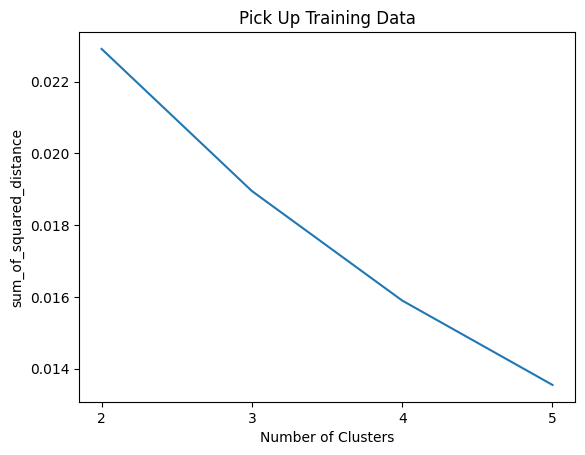

In [18]:
#Create an elbow plot to determine the number of clusters to be made.
#The goal is to minimize the sum of squared distance

sum_of_squared_distances = []
number_of_clusters = range(2, 6)

for i in number_of_clusters:
    cluster_centers, sum_of_squared_distance = kmeans(sample1,i)
    sum_of_squared_distances.append(sum_of_squared_distance)

elbow_plot = pd.DataFrame({'Number of Clusters': number_of_clusters, 'sum_of_squared_distance':sum_of_squared_distances})

sns.lineplot(x='Number of Clusters', y='sum_of_squared_distance', data=elbow_plot)
plt.xticks(number_of_clusters)
plt.title("Pick Up Training Data")
plt.show()

In [19]:
sample2 = data_coordinates[['dropoff_longitude','dropoff_latitude']]
sample2.describe()

dropoff_longitude  dropoff_latitude
count      484143.000000     484143.000000
mean          -73.974148         40.751294
std             0.032749          0.030498
min           -74.244448         40.514328
25%           -73.991470         40.735800
50%           -73.980535         40.753940
75%           -73.965302         40.768394
max           -73.701188         40.911983

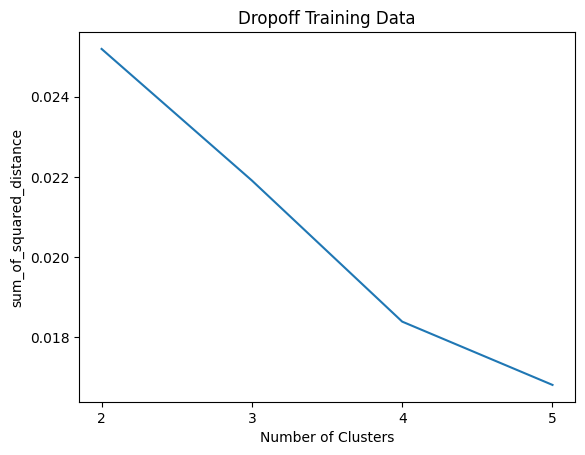

In [20]:
#Create an elbow plot to determine the number of clusters to be made.
#The goal is to minimize the sum of squared distance

sum_of_squared_distances = []
number_of_clusters = range(2, 6)

for i in number_of_clusters:
    cluster_centers, sum_of_squared_distance = kmeans(sample2,i)
    sum_of_squared_distances.append(sum_of_squared_distance)

elbow_plot = pd.DataFrame({'Number of Clusters': number_of_clusters, 'sum_of_squared_distance':sum_of_squared_distances})

sns.lineplot(x='Number of Clusters', y='sum_of_squared_distance', data=elbow_plot)
plt.xticks(number_of_clusters)
plt.title("Dropoff Training Data")
plt.show()

**Clustering the data**

In [21]:
#Clustering the data
pickup_clusters = KMeans(n_clusters=4, random_state=0).fit(data_coordinates.filter(regex='pickup'))
dropoff_clusters = KMeans(n_clusters=4, random_state=0).fit(data_coordinates.filter(regex='dropoff'))

train_data['pickup_cluster'] = pickup_clusters.labels_
train_data['dropoff_cluster'] = dropoff_clusters.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Plotting on Map**

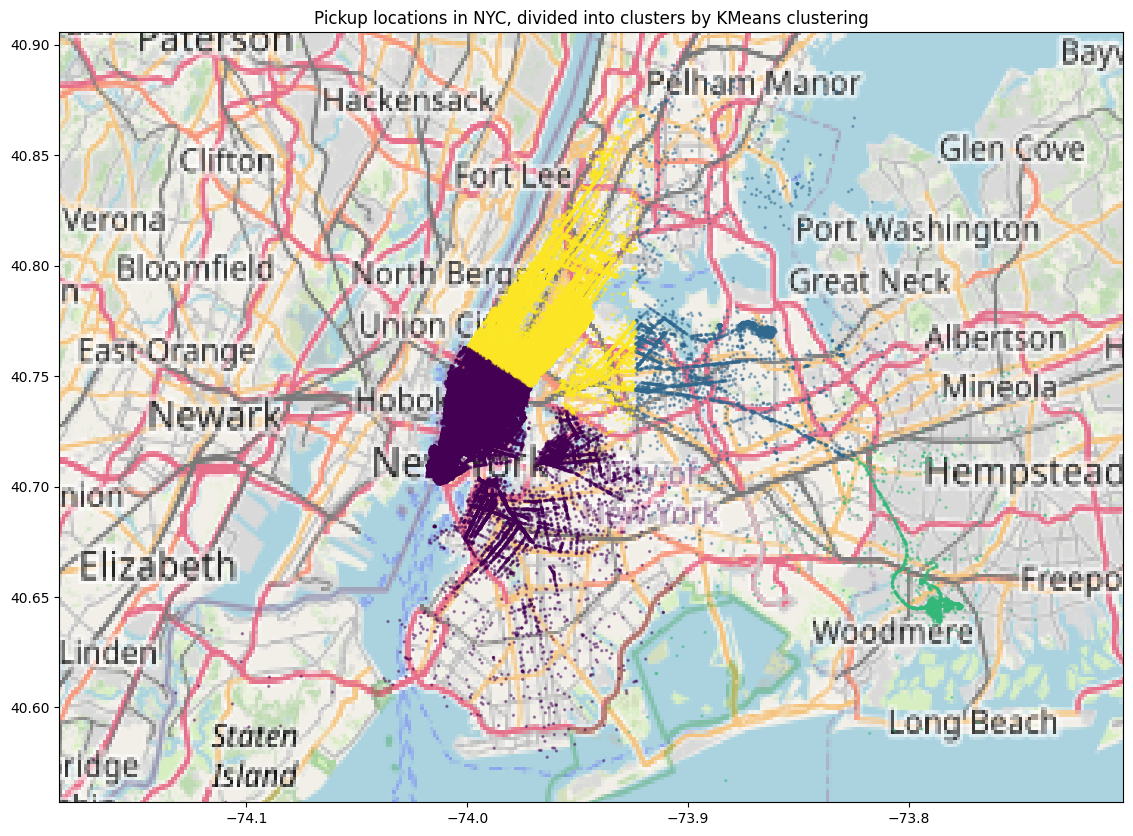

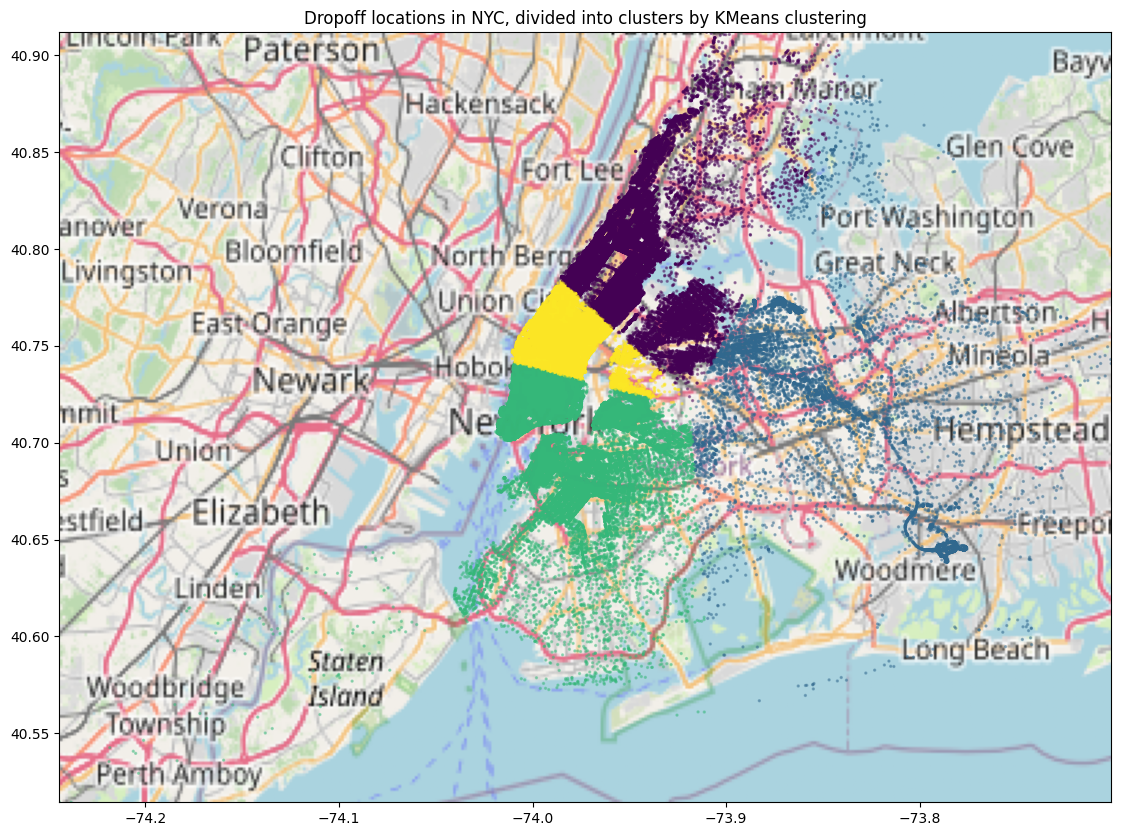

In [22]:
nyc_map = plt.imread('/kaggle/input/mapnyc-png/map.png')
# Adapted from https://www.kaggle.com/breemen/nyc-taxi-fare-data-exploration/notebook
# this function will be used more often to plot data on the NYC map
def plot_on_map(data_coord, BB, nyc_map, figsize=(15, 10), clusters='pickup', colors=True, autoScale=True, title='Unnamed figure'):
    if(clusters == 'pickup'):
        if(colors):
            colors = (train_data.pickup_cluster-train_data.pickup_cluster.mean())/train_data.pickup_cluster.std()
        else:
            colors = 'r'
        longitude = data_coord.pickup_longitude
        latitude = data_coord.pickup_latitude
    elif(clusters == 'dropoff'):
        if(colors):
            colors = (train_data.dropoff_cluster-train_data.dropoff_cluster.mean())/train_data.dropoff_cluster.std()
        else:
            colors = 'r'
        longitude = data_coord.dropoff_longitude
        latitude = data_coord.dropoff_latitude
        
    plt.figure(figsize=figsize)
    plt.scatter(longitude, latitude, zorder=1, alpha=0.4, c=colors, s=2)
    plt.title(title)
    axes = plt.gca()
    if(autoScale):
        if(abs(longitude.max() - longitude.min()) < 0.1):
            xmin = longitude.min() - 0.2
            xmax = longitude.max() + 0.2
        else:
            xmin = longitude.min()
            xmax = longitude.max()
        
        if(abs(latitude.max() - latitude.min()) < 0.1):
            ymin = latitude.min() - 0.2
            ymax = latitude.max() + 0.2
        else:
            ymin = latitude.min()
            ymax = latitude.max()
        axes.set_xlim(xmin, xmax)
        axes.set_ylim(ymin, ymax)
    plt.imshow(nyc_map, zorder=0, extent=[-75, -73, 40, 41.5]);
    
plot_on_map(data_coordinates, BB, nyc_map, clusters='pickup', title='Pickup locations in NYC, divided into clusters by KMeans clustering')
plot_on_map(data_coordinates, BB, nyc_map, clusters='dropoff', title='Dropoff locations in NYC, divided into clusters by KMeans clustering')

In [23]:
train_data.head()

distance  month  hour  year         pickup_datetime day_of_week  \
0  4.363706     10     3  2009  2009/10/19 03:10:00+00      Monday   
1  1.630437      9     4  2011  2011/09/23 04:35:00+00      Friday   
2  0.294285      5    19  2011  2011/05/02 19:11:00+00      Monday   
3  1.760516      3    14  2012  2012/03/09 14:51:00+00      Friday   
4  0.073032      5     0  2012  2012/05/17 00:03:56+00    Thursday   

  pickup_date  holiday_or_not holiday_name  fare_amount  passenger_count  \
0  10/19/2009           False          NaN         25.3                3   
1   9/23/2011           False          NaN          7.7                5   
2    5/2/2011           False          NaN          9.7                1   
3    3/9/2012           False          NaN          6.9                1   
4   5/17/2012           False          NaN          5.7                1   

   pickup_cluster  dropoff_cluster  
0               0                2  
1               0                2  
2               0                2  
3               0                2  
4               0                2

In [24]:
# Density for Pickup Clusters
pickup_cluster_density = train_data['pickup_cluster'].value_counts(normalize=True).reset_index()

# Density for Dropoff Clusters
dropoff_cluster_density = train_data['dropoff_cluster'].value_counts(normalize=True).reset_index()

# Print or use the density information as needed
print("Pickup Cluster Density:")
print(pickup_cluster_density)

print("\nDropoff Cluster Density:")
print(dropoff_cluster_density)

Pickup Cluster Density:
   pickup_cluster  proportion
0               3    0.489308
1               0    0.466439
2               1    0.028357
3               2    0.015896

Dropoff Cluster Density:
   dropoff_cluster  proportion
0                3    0.486809
1                2    0.242532
2                0    0.234722
3                1    0.035938


**PickUp Location Cluster Meanings**

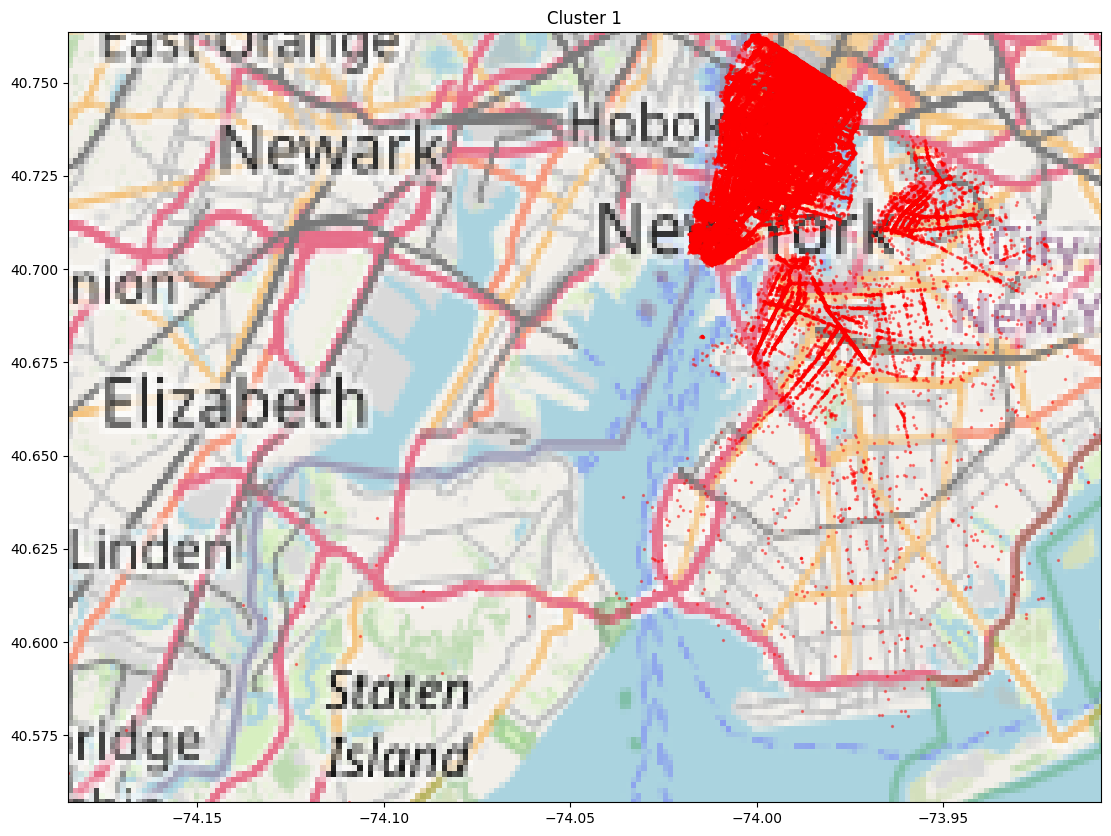

In [25]:
plot_on_map(data_coordinates[train_data.pickup_cluster == 0], BB, nyc_map, colors=False, title='Cluster 1')

**The Cluster 0 of PickUp locations represents the upper east side of New York which is famous for Museums, Art Galleries, Hotels and Houses of Worship** 

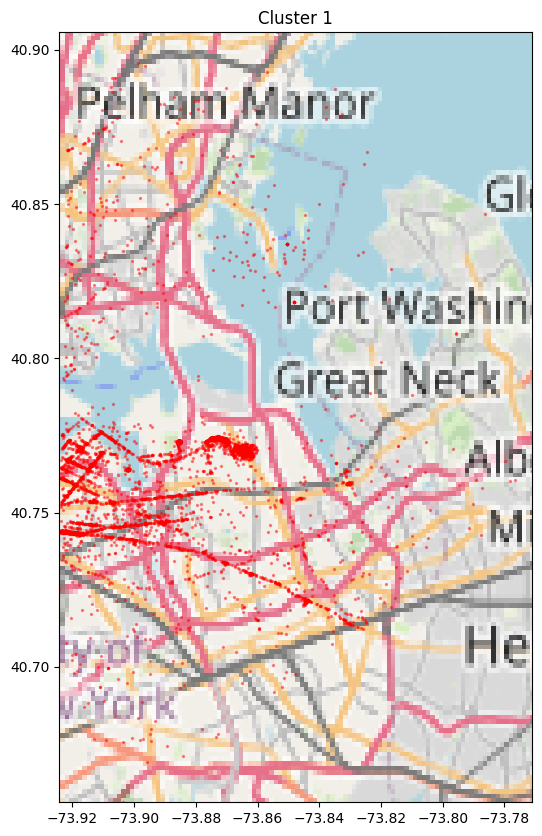

In [26]:
plot_on_map(data_coordinates[train_data.pickup_cluster == 1], BB, nyc_map, colors=False, title='Cluster 1')

**Cluster 01 of PickUp consists of the Midtown area including the Empire State Building, the Chrysler Building, the Hudson Yards Redevelopment Project, the headquarters of the United Nations, Grand Central Terminal, and Rockefeller Center, as well as several prominent tourist destinations including Broadway**

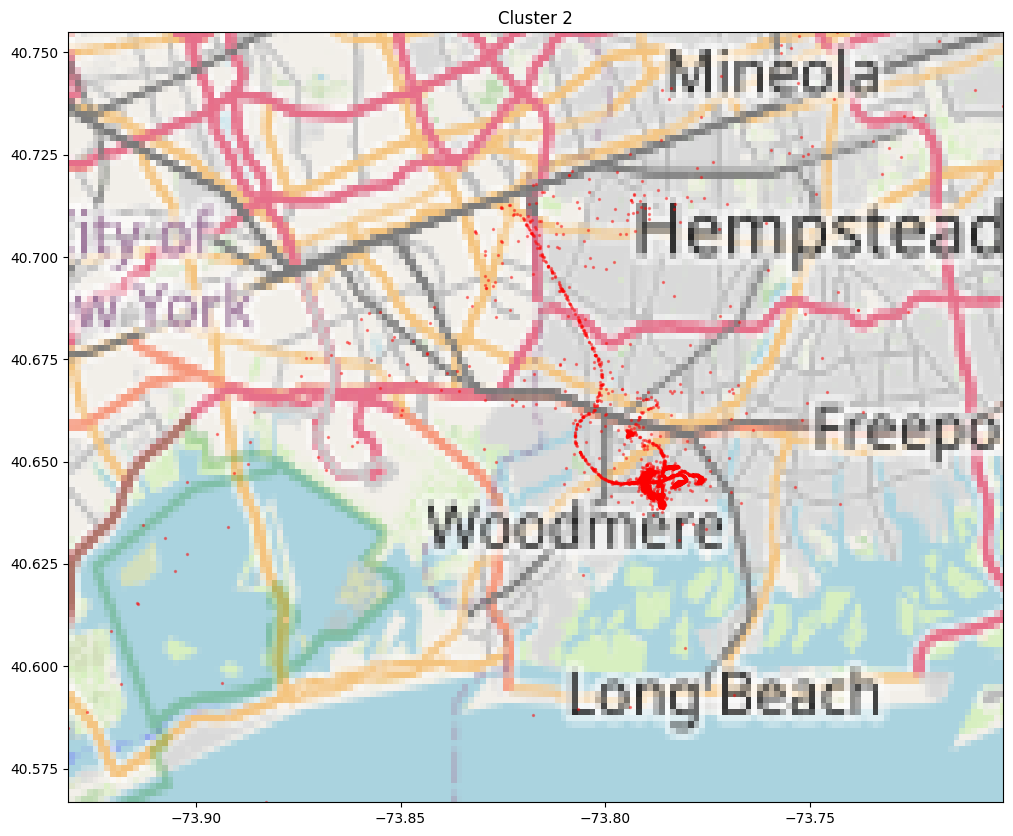

In [27]:
plot_on_map(data_coordinates[train_data.pickup_cluster == 2], BB, nyc_map, colors=False, title='Cluster 2')

**Cluster 02 of PickUp scattered around the Brooklyn area**

**Drop Off Cluster Meanings**

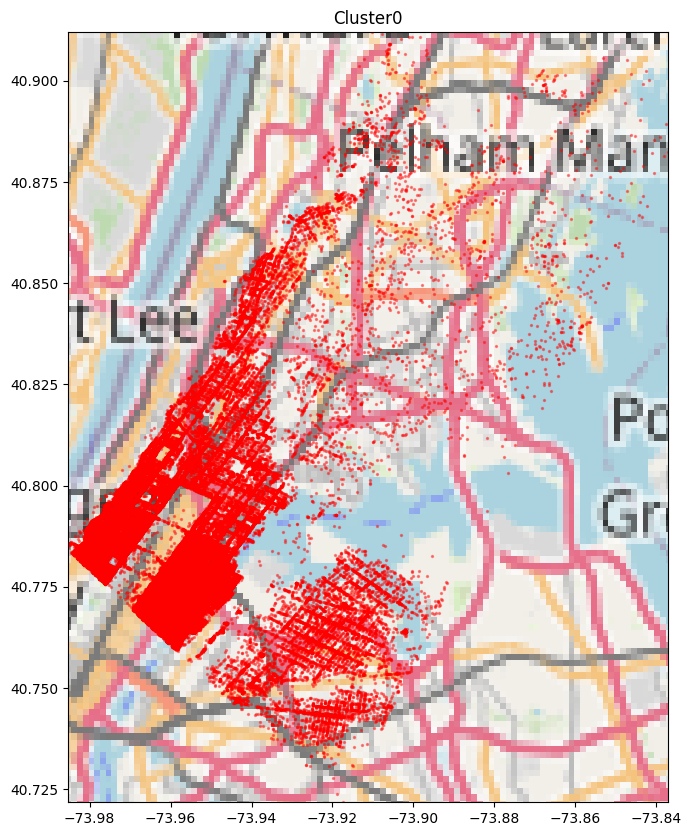

In [28]:
plot_on_map(data_coordinates[train_data.dropoff_cluster == 0], BB, nyc_map, clusters='dropoff', colors=False, title='Cluster0')

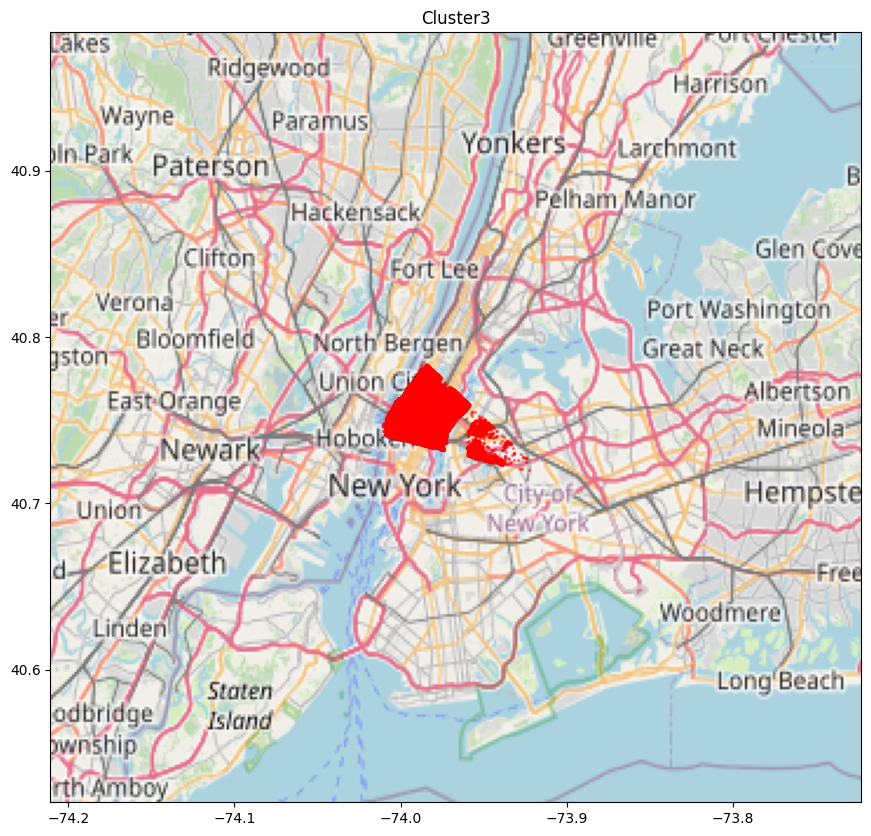

In [29]:
plot_on_map(data_coordinates[train_data.dropoff_cluster == 3], BB, nyc_map, clusters='dropoff', colors=False, title='Cluster3')

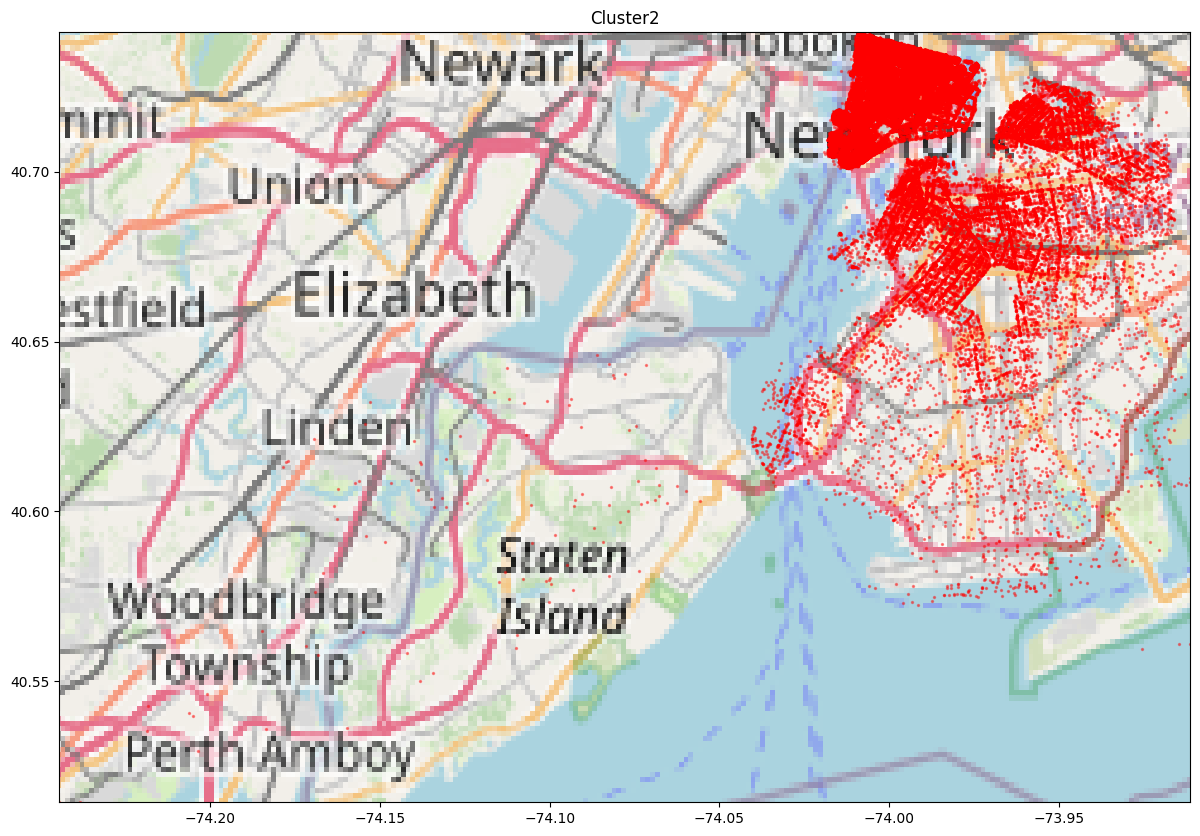

In [30]:
plot_on_map(data_coordinates[train_data.dropoff_cluster == 2], BB, nyc_map, clusters='dropoff', colors=False, title='Cluster2')

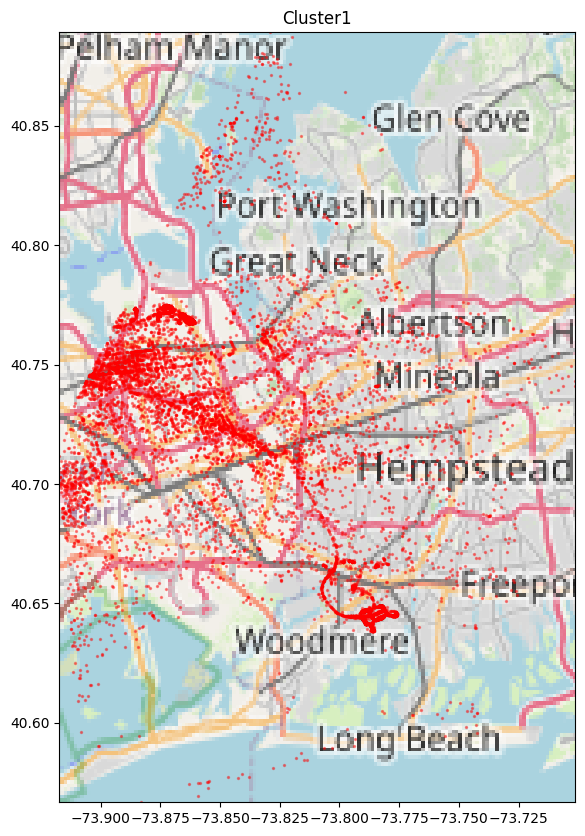

In [31]:
plot_on_map(data_coordinates[train_data.dropoff_cluster == 1], BB, nyc_map, clusters='dropoff', colors=False, title='Cluster1')

Great! Now that we have an idea about the clusters and the locations associated with it. We can give the popularity measure based on proportions to the clusters

In [32]:
train_data.head()

distance  month  hour  year         pickup_datetime day_of_week  \
0  4.363706     10     3  2009  2009/10/19 03:10:00+00      Monday   
1  1.630437      9     4  2011  2011/09/23 04:35:00+00      Friday   
2  0.294285      5    19  2011  2011/05/02 19:11:00+00      Monday   
3  1.760516      3    14  2012  2012/03/09 14:51:00+00      Friday   
4  0.073032      5     0  2012  2012/05/17 00:03:56+00    Thursday   

  pickup_date  holiday_or_not holiday_name  fare_amount  passenger_count  \
0  10/19/2009           False          NaN         25.3                3   
1   9/23/2011           False          NaN          7.7                5   
2    5/2/2011           False          NaN          9.7                1   
3    3/9/2012           False          NaN          6.9                1   
4   5/17/2012           False          NaN          5.7                1   

   pickup_cluster  dropoff_cluster  
0               0                2  
1               0                2  
2               0                2  
3               0                2  
4               0                2

In [33]:
# Select the top 3 clusters for pickup and dropoff
top_4_pickup_clusters = train_data['pickup_cluster'].value_counts(normalize=True).reset_index().nlargest(4, 'proportion')['pickup_cluster'].tolist()
top_4_dropoff_clusters = train_data['dropoff_cluster'].value_counts(normalize=True).reset_index().nlargest(4, 'proportion')['dropoff_cluster'].tolist()

# Define cluster renaming rules for pickup
pickup_cluster_names = {
    top_4_pickup_clusters[0]: "Extremely Popular Pickup Area",
    top_4_pickup_clusters[1]: "Moderately Popular Pickup Area",
    top_4_pickup_clusters[2]: "Less Popular Pickup Area",
    top_4_pickup_clusters[3]: "Unpopular Pickup Area",
}

# Define cluster renaming rules for dropoff
dropoff_cluster_names = {
    top_4_dropoff_clusters[0]: "Extremely Popular Dropoff Area",
    top_4_dropoff_clusters[1]: "Moderately Popular Dropoff Area",
    top_4_dropoff_clusters[2]: "Less Popular Dropoff Area",
    top_4_dropoff_clusters[3]: "Unpopular Dropoff Area",
}

# Apply cluster renaming to the DataFrame
train_data['pickup_location_popularity'] = train_data['pickup_cluster'].map(pickup_cluster_names)
train_data['dropoff_location_popularity'] = train_data['dropoff_cluster'].map(dropoff_cluster_names)

# Print or use the updated DataFrame as needed
print(train_data[['pickup_cluster', 'pickup_location_popularity', 'dropoff_cluster', 'dropoff_location_popularity']])


        pickup_cluster      pickup_location_popularity  dropoff_cluster  \
0                    0  Moderately Popular Pickup Area                2   
1                    0  Moderately Popular Pickup Area                2   
2                    0  Moderately Popular Pickup Area                2   
3                    0  Moderately Popular Pickup Area                2   
4                    0  Moderately Popular Pickup Area                2   
...                ...                             ...              ...   
484138               0  Moderately Popular Pickup Area                2   
484139               0  Moderately Popular Pickup Area                2   
484140               0  Moderately Popular Pickup Area                2   
484141               0  Moderately Popular Pickup Area                2   
484142               0  Moderately Popular Pickup Area                2   

            dropoff_location_popularity  
0       Moderately Popular Dropoff Area  
1       Moderat

In [34]:
train_data.head()

distance  month  hour  year         pickup_datetime day_of_week  \
0  4.363706     10     3  2009  2009/10/19 03:10:00+00      Monday   
1  1.630437      9     4  2011  2011/09/23 04:35:00+00      Friday   
2  0.294285      5    19  2011  2011/05/02 19:11:00+00      Monday   
3  1.760516      3    14  2012  2012/03/09 14:51:00+00      Friday   
4  0.073032      5     0  2012  2012/05/17 00:03:56+00    Thursday   

  pickup_date  holiday_or_not holiday_name  fare_amount  passenger_count  \
0  10/19/2009           False          NaN         25.3                3   
1   9/23/2011           False          NaN          7.7                5   
2    5/2/2011           False          NaN          9.7                1   
3    3/9/2012           False          NaN          6.9                1   
4   5/17/2012           False          NaN          5.7                1   

   pickup_cluster  dropoff_cluster      pickup_location_popularity  \
0               0                2  Moderately Popular Pickup Area   
1               0                2  Moderately Popular Pickup Area   
2               0                2  Moderately Popular Pickup Area   
3               0                2  Moderately Popular Pickup Area   
4               0                2  Moderately Popular Pickup Area   

       dropoff_location_popularity  
0  Moderately Popular Dropoff Area  
1  Moderately Popular Dropoff Area  
2  Moderately Popular Dropoff Area  
3  Moderately Popular Dropoff Area  
4  Moderately Popular Dropoff Area

In [35]:
dropoff_popularity_counts = train_data['dropoff_location_popularity'].value_counts()
print(dropoff_popularity_counts)
total_dropoff_counts = dropoff_popularity_counts.sum()

dropoff_location_popularity
Extremely Popular Dropoff Area     235685
Moderately Popular Dropoff Area    117420
Less Popular Dropoff Area          113639
Unpopular Dropoff Area              17399
Name: count, dtype: int64


In [36]:
total_dropoff_counts = dropoff_popularity_counts.sum()
print(total_dropoff_counts)

484143


In [37]:
pickup_popularity_counts = train_data['pickup_location_popularity'].value_counts()
print(pickup_popularity_counts)

pickup_location_popularity
Extremely Popular Pickup Area     236895
Moderately Popular Pickup Area    225823
Less Popular Pickup Area           13729
Unpopular Pickup Area               7696
Name: count, dtype: int64


In [38]:
total_pickup_counts = pickup_popularity_counts.sum()
print(total_pickup_counts)

484143


# PickUp Location Time Analysis

**Explore how "Extremely Popular Pickup Area" has changed over time**

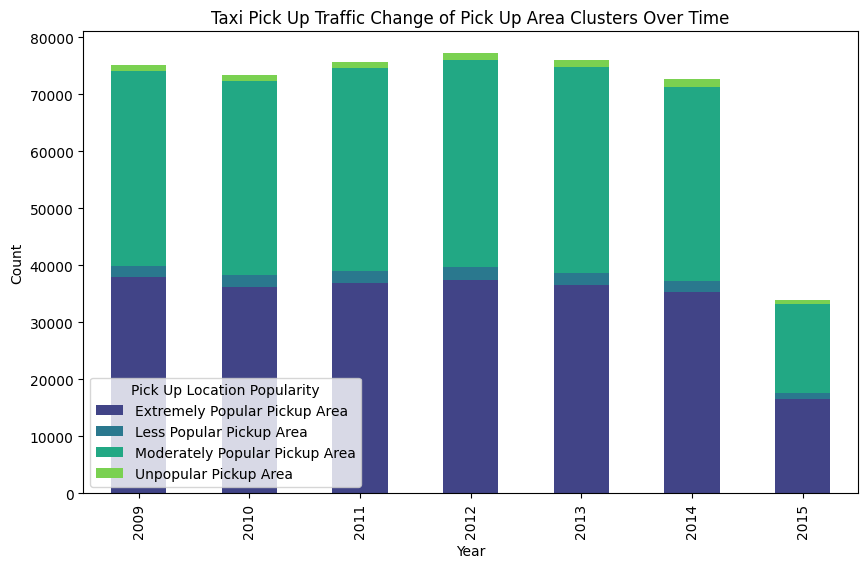

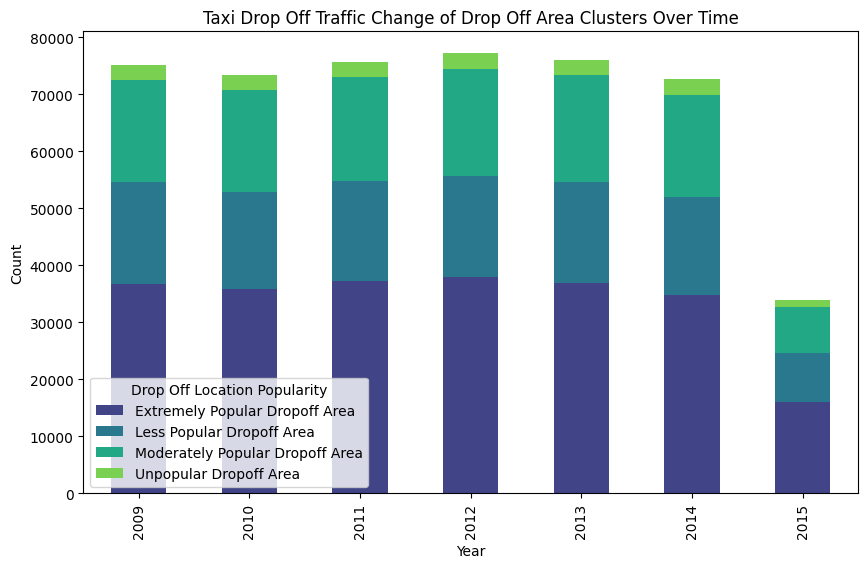

In [39]:
popularity_counts = train_data.groupby(['year', 'pickup_location_popularity']).size().unstack(fill_value=0)

# Define a custom color palette using the "viridis" palette from Matplotlib
custom_palette = sns.color_palette("viridis", n_colors=len(popularity_counts.columns))

# Plotting the results with the custom color palette
ax = popularity_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_palette)
ax.legend(title='Pick Up Location Popularity')
plt.title('Taxi Pick Up Traffic Change of Pick Up Area Clusters Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


popularity_counts = train_data.groupby(['year', 'dropoff_location_popularity']).size().unstack(fill_value=0)

# Define a custom color palette using the "viridis" palette from Matplotlib
custom_palette = sns.color_palette("viridis", n_colors=len(popularity_counts.columns))

# Plotting the results with the custom color palette
ax = popularity_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_palette)
ax.legend(title='Drop Off Location Popularity')
plt.title('Taxi Drop Off Traffic Change of Drop Off Area Clusters Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

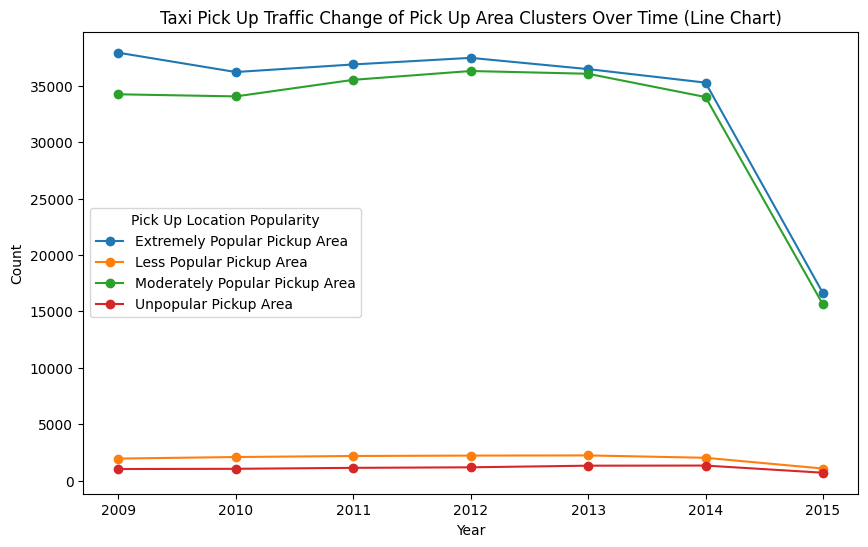

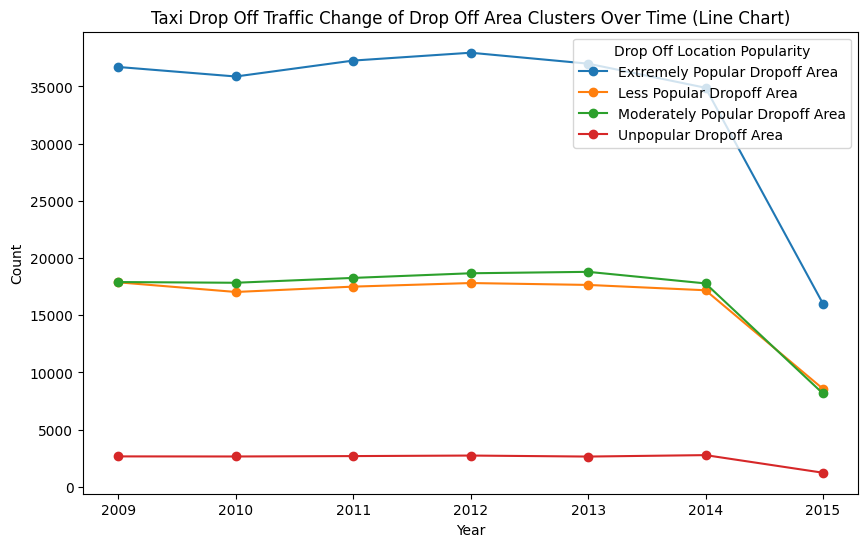

In [40]:
# Plotting the results as a line chart
popularity_counts = train_data.groupby(['year', 'pickup_location_popularity']).size().unstack(fill_value=0)

popularity_counts.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Taxi Pick Up Traffic Change of Pick Up Area Clusters Over Time (Line Chart)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Pick Up Location Popularity')
plt.show()


popularity_counts = train_data.groupby(['year', 'dropoff_location_popularity']).size().unstack(fill_value=0)

# Plotting the results as a line chart
popularity_counts.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Taxi Drop Off Traffic Change of Drop Off Area Clusters Over Time (Line Chart)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Drop Off Location Popularity')
plt.show()

In [41]:
train_data.head()

distance  month  hour  year         pickup_datetime day_of_week  \
0  4.363706     10     3  2009  2009/10/19 03:10:00+00      Monday   
1  1.630437      9     4  2011  2011/09/23 04:35:00+00      Friday   
2  0.294285      5    19  2011  2011/05/02 19:11:00+00      Monday   
3  1.760516      3    14  2012  2012/03/09 14:51:00+00      Friday   
4  0.073032      5     0  2012  2012/05/17 00:03:56+00    Thursday   

  pickup_date  holiday_or_not holiday_name  fare_amount  passenger_count  \
0  10/19/2009           False          NaN         25.3                3   
1   9/23/2011           False          NaN          7.7                5   
2    5/2/2011           False          NaN          9.7                1   
3    3/9/2012           False          NaN          6.9                1   
4   5/17/2012           False          NaN          5.7                1   

   pickup_cluster  dropoff_cluster      pickup_location_popularity  \
0               0                2  Moderately Popular Pickup Area   
1               0                2  Moderately Popular Pickup Area   
2               0                2  Moderately Popular Pickup Area   
3               0                2  Moderately Popular Pickup Area   
4               0                2  Moderately Popular Pickup Area   

       dropoff_location_popularity  
0  Moderately Popular Dropoff Area  
1  Moderately Popular Dropoff Area  
2  Moderately Popular Dropoff Area  
3  Moderately Popular Dropoff Area  
4  Moderately Popular Dropoff Area

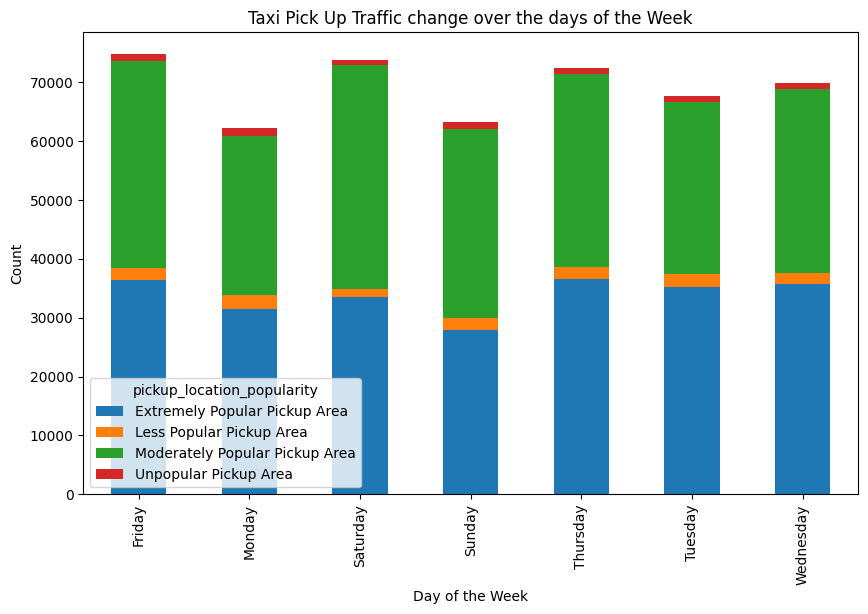

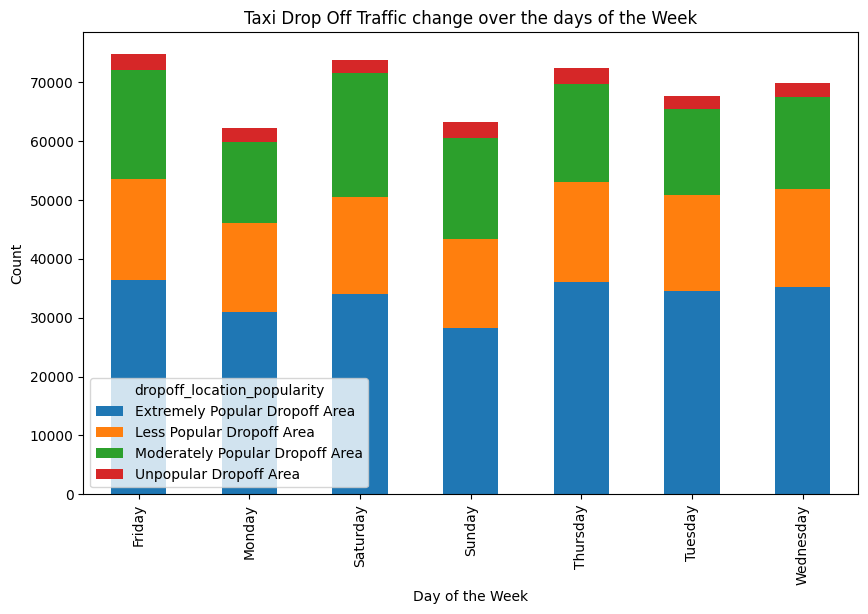

In [42]:
#Now we need to check how this will change over time
# Group the data by 'year' and 'pickup_location_popularity', then count the occurrences
popularity_counts = train_data.groupby(['day_of_week', 'pickup_location_popularity']).size().unstack(fill_value=0)

# Plotting the results
popularity_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Taxi Pick Up Traffic change over the days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

#Now we need to check how this will change over time
# Group the data by 'year' and 'dropoff_location_popularity', then count the occurrences
popularity_counts = train_data.groupby(['day_of_week', 'dropoff_location_popularity']).size().unstack(fill_value=0)

# Plotting the results
popularity_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Taxi Drop Off Traffic change over the days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

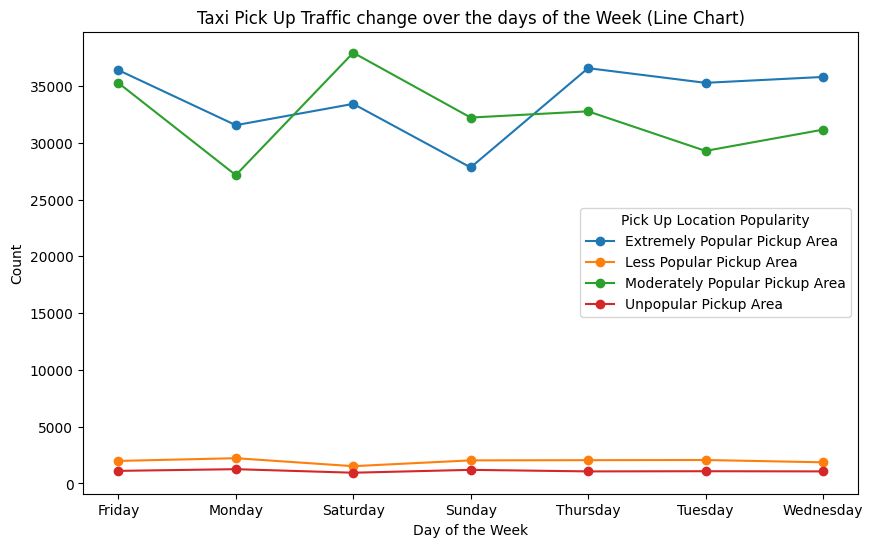

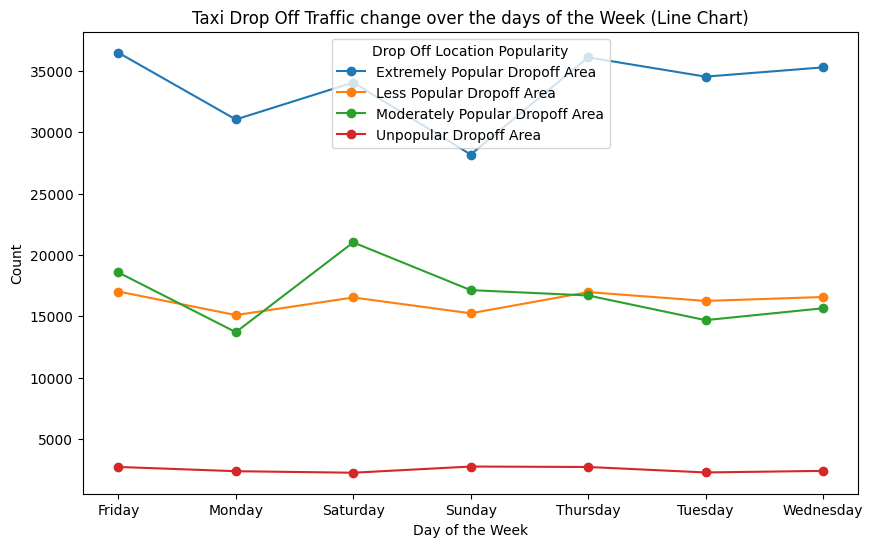

In [43]:
# Plotting the results as a line chart
popularity_counts = train_data.groupby(['day_of_week', 'pickup_location_popularity']).size().unstack(fill_value=0)
custom_palette = sns.color_palette("viridis", n_colors=len(popularity_counts.columns))

popularity_counts.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Taxi Pick Up Traffic change over the days of the Week (Line Chart)')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Pick Up Location Popularity')
plt.show()

# Plotting the results as a line chart
popularity_counts = train_data.groupby(['day_of_week', 'dropoff_location_popularity']).size().unstack(fill_value=0)
custom_palette = sns.color_palette("viridis", n_colors=len(popularity_counts.columns))

popularity_counts.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Taxi Drop Off Traffic change over the days of the Week (Line Chart)')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Drop Off Location Popularity')
plt.show()

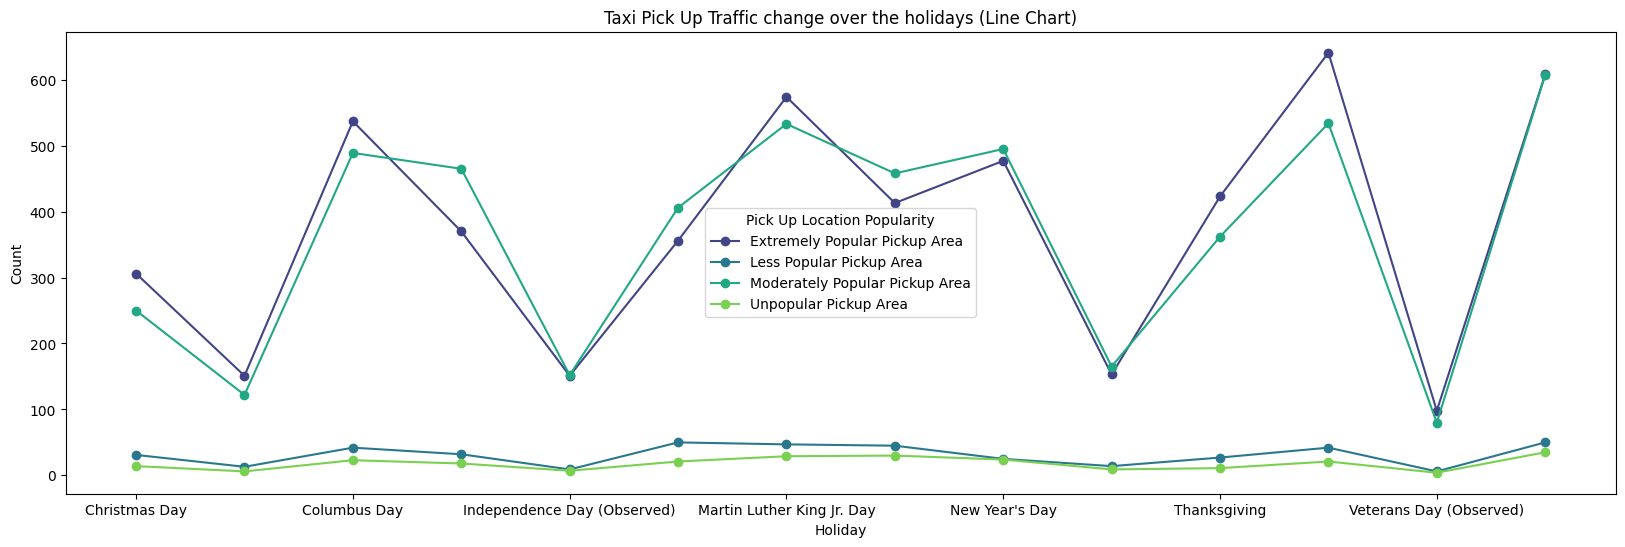

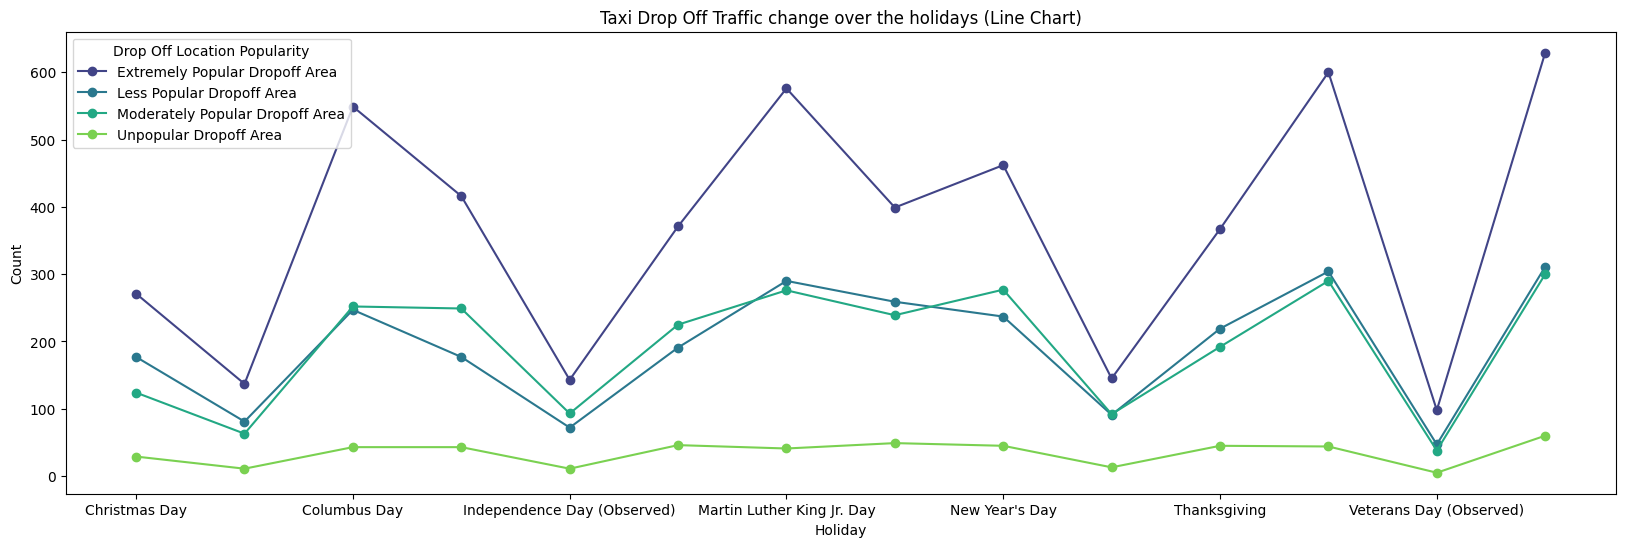

In [44]:
# Plotting the results as a line chart
popularity_counts = train_data.groupby(['holiday_name', 'pickup_location_popularity']).size().unstack(fill_value=0)
custom_palette = sns.color_palette("viridis", n_colors=len(popularity_counts.columns))

popularity_counts.plot(kind='line', marker='o', figsize=(20, 6), color=custom_palette)
plt.title('Taxi Pick Up Traffic change over the holidays (Line Chart)')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.legend(title='Pick Up Location Popularity')
plt.show()

# Plotting the results as a line chart
popularity_counts = train_data.groupby(['holiday_name', 'dropoff_location_popularity']).size().unstack(fill_value=0)
custom_palette = sns.color_palette("viridis", n_colors=len(popularity_counts.columns))

popularity_counts.plot(kind='line', marker='o', figsize=(20, 6), color=custom_palette)
plt.title('Taxi Drop Off Traffic change over the holidays (Line Chart)')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.legend(title='Drop Off Location Popularity')
plt.show()

In [45]:
data_coordinates.head()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude
0        -74.102257        40.620580         -74.113213         40.582228
1        -74.089848        40.609495         -74.073173         40.602097
2        -74.109358        40.557018         -74.109812         40.559642
3        -74.089560        40.613708         -74.106953         40.622447
4        -74.106327        40.601547         -74.105547         40.601831

In [46]:
train_data.head()

distance  month  hour  year         pickup_datetime day_of_week  \
0  4.363706     10     3  2009  2009/10/19 03:10:00+00      Monday   
1  1.630437      9     4  2011  2011/09/23 04:35:00+00      Friday   
2  0.294285      5    19  2011  2011/05/02 19:11:00+00      Monday   
3  1.760516      3    14  2012  2012/03/09 14:51:00+00      Friday   
4  0.073032      5     0  2012  2012/05/17 00:03:56+00    Thursday   

  pickup_date  holiday_or_not holiday_name  fare_amount  passenger_count  \
0  10/19/2009           False          NaN         25.3                3   
1   9/23/2011           False          NaN          7.7                5   
2    5/2/2011           False          NaN          9.7                1   
3    3/9/2012           False          NaN          6.9                1   
4   5/17/2012           False          NaN          5.7                1   

   pickup_cluster  dropoff_cluster      pickup_location_popularity  \
0               0                2  Moderately Popular Pickup Area   
1               0                2  Moderately Popular Pickup Area   
2               0                2  Moderately Popular Pickup Area   
3               0                2  Moderately Popular Pickup Area   
4               0                2  Moderately Popular Pickup Area   

       dropoff_location_popularity  
0  Moderately Popular Dropoff Area  
1  Moderately Popular Dropoff Area  
2  Moderately Popular Dropoff Area  
3  Moderately Popular Dropoff Area  
4  Moderately Popular Dropoff Area

In [47]:
# Define a function to map each hour to time of day categories
def map_to_time_of_day(hour):
    if 0 <= hour < 3:
        return 'Late Night'
    elif 3 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 9:
        return 'Morning'
    elif 9 <= hour < 12:
        return 'Late Morning'
    elif 12 <= hour < 15:
        return 'Afternoon'
    elif 15 <= hour < 18:
        return 'Late Afternoon'
    elif 18 <= hour < 21:
        return 'Evening'
    elif 21 <= hour < 24:
        return 'Night'

# Apply the function to create the 'Time of Day' column
train_data['Time of Day'] = train_data['hour'].apply(map_to_time_of_day)

In [48]:
train_data.head()

distance  month  hour  year         pickup_datetime day_of_week  \
0  4.363706     10     3  2009  2009/10/19 03:10:00+00      Monday   
1  1.630437      9     4  2011  2011/09/23 04:35:00+00      Friday   
2  0.294285      5    19  2011  2011/05/02 19:11:00+00      Monday   
3  1.760516      3    14  2012  2012/03/09 14:51:00+00      Friday   
4  0.073032      5     0  2012  2012/05/17 00:03:56+00    Thursday   

  pickup_date  holiday_or_not holiday_name  fare_amount  passenger_count  \
0  10/19/2009           False          NaN         25.3                3   
1   9/23/2011           False          NaN          7.7                5   
2    5/2/2011           False          NaN          9.7                1   
3    3/9/2012           False          NaN          6.9                1   
4   5/17/2012           False          NaN          5.7                1   

   pickup_cluster  dropoff_cluster      pickup_location_popularity  \
0               0                2  Moderately Popular Pickup Area   
1               0                2  Moderately Popular Pickup Area   
2               0                2  Moderately Popular Pickup Area   
3               0                2  Moderately Popular Pickup Area   
4               0                2  Moderately Popular Pickup Area   

       dropoff_location_popularity    Time of Day  
0  Moderately Popular Dropoff Area  Early Morning  
1  Moderately Popular Dropoff Area  Early Morning  
2  Moderately Popular Dropoff Area        Evening  
3  Moderately Popular Dropoff Area      Afternoon  
4  Moderately Popular Dropoff Area     Late Night

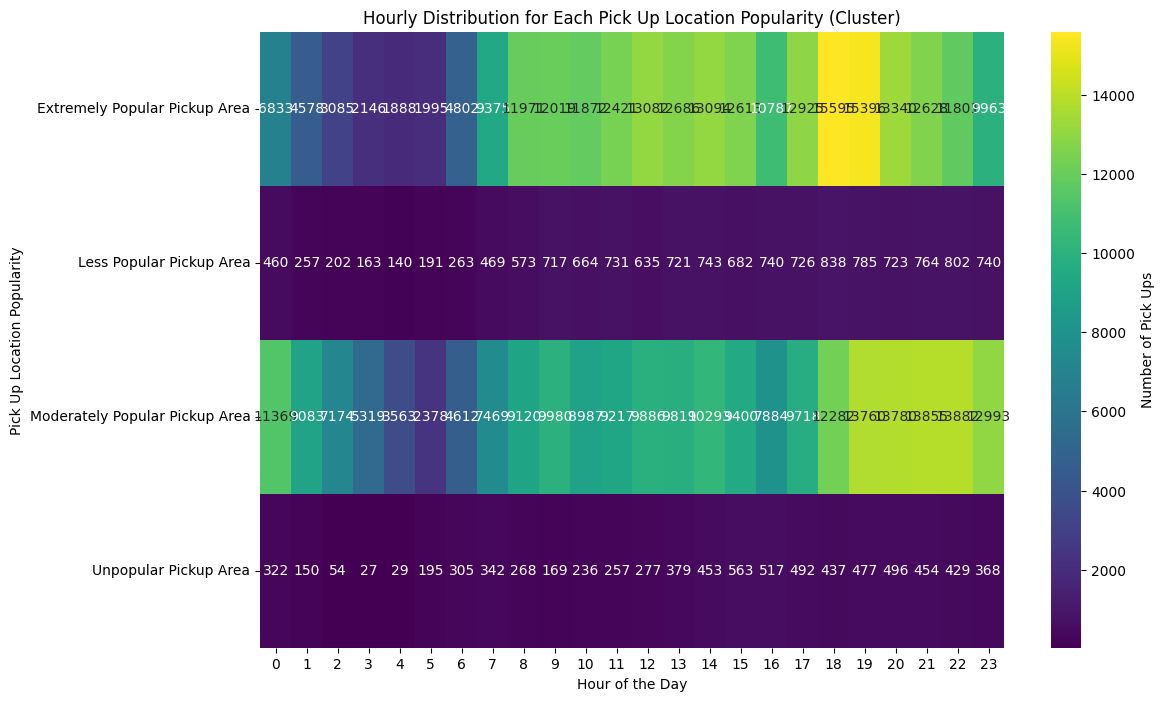

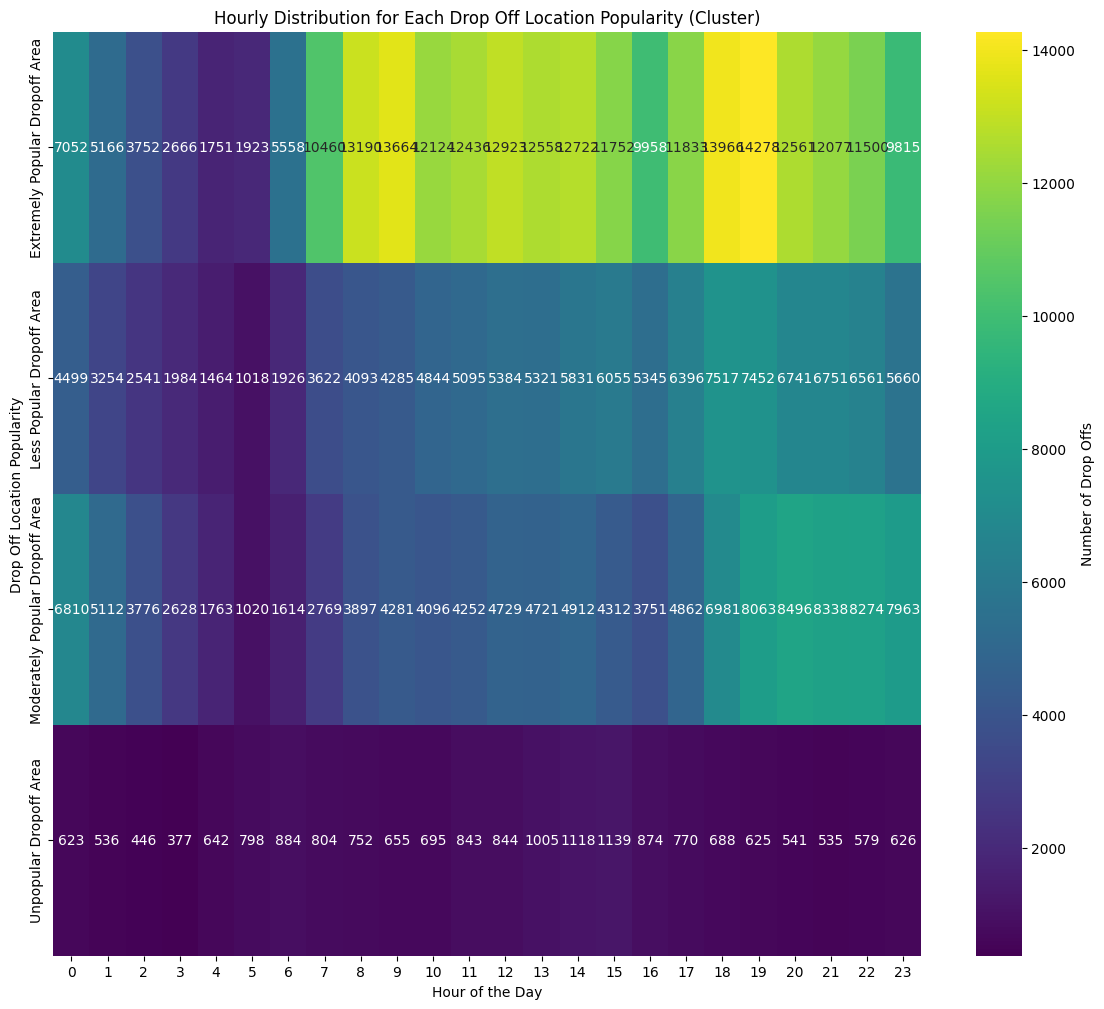

In [49]:
#Hourly Distribution for each cluster

# Create a pivot table to prepare data for the heatmap
heatmap_data = train_data.pivot_table(index='pickup_location_popularity', columns='hour', aggfunc='size', fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Number of Pick Ups'})
plt.title('Hourly Distribution for Each Pick Up Location Popularity (Cluster)')
plt.xlabel('Hour of the Day')
plt.ylabel('Pick Up Location Popularity')
plt.show()

#Hourly Distribution for each cluster

# Create a pivot table to prepare data for the heatmap
heatmap_data = train_data.pivot_table(index='dropoff_location_popularity', columns='hour', aggfunc='size', fill_value=0)

# Create the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Number of Drop Offs'})
plt.title('Hourly Distribution for Each Drop Off Location Popularity (Cluster)')
plt.xlabel('Hour of the Day')
plt.ylabel('Drop Off Location Popularity')
plt.show()

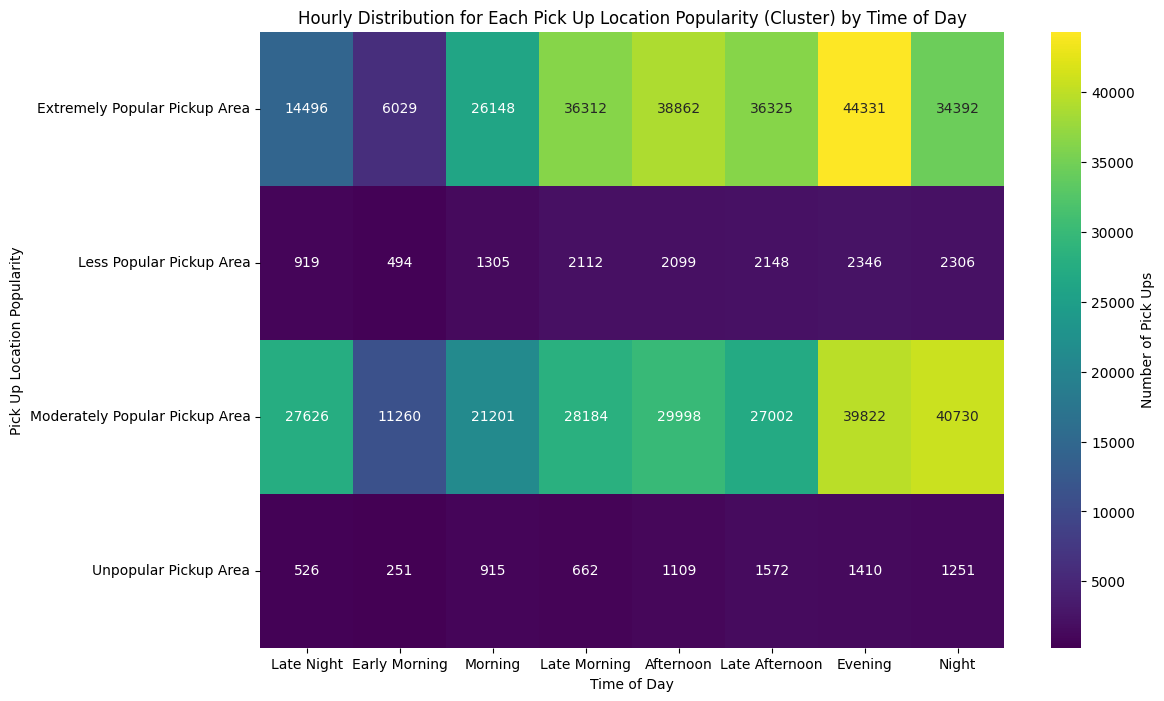

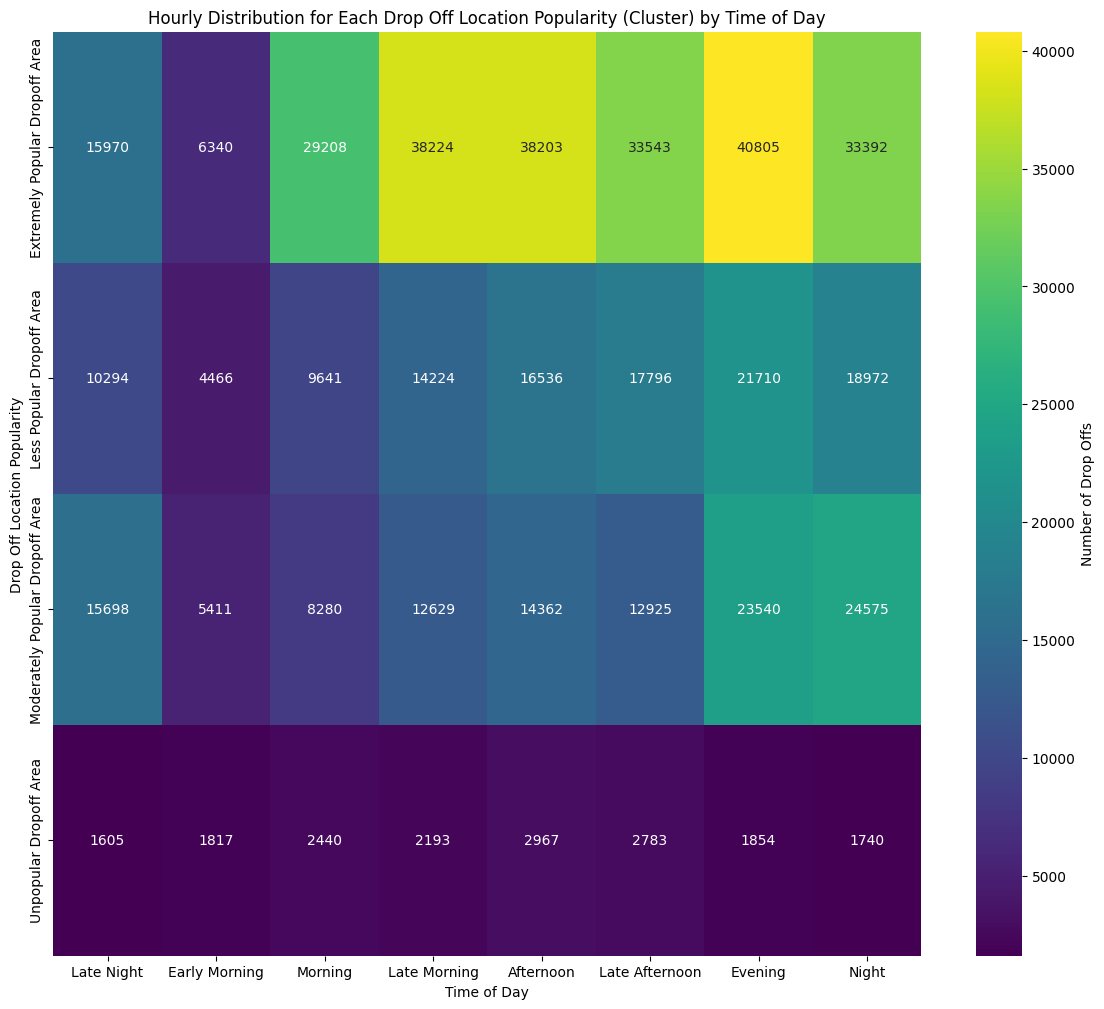

In [50]:
# Create a pivot table to prepare data for the heatmap
heatmap_data = train_data.pivot_table(index='pickup_location_popularity', columns='Time of Day', aggfunc='size', fill_value=0)

# Define the order of time of day categories for better visualization
time_of_day_order = ['Late Night', 'Early Morning', 'Morning', 'Late Morning', 'Afternoon', 'Late Afternoon', 'Evening', 'Night']

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data.loc[:, time_of_day_order], cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Number of Pick Ups'})
plt.title('Hourly Distribution for Each Pick Up Location Popularity (Cluster) by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Pick Up Location Popularity')
plt.show()

# Create a pivot table to prepare data for the heatmap
heatmap_data = train_data.pivot_table(index='dropoff_location_popularity', columns='Time of Day', aggfunc='size', fill_value=0)

# Define the order of time of day categories for better visualization
time_of_day_order = ['Late Night', 'Early Morning', 'Morning', 'Late Morning', 'Afternoon', 'Late Afternoon', 'Evening', 'Night']

# Create the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(heatmap_data.loc[:, time_of_day_order], cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Number of Drop Offs'})
plt.title('Hourly Distribution for Each Drop Off Location Popularity (Cluster) by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Drop Off Location Popularity')
plt.show()

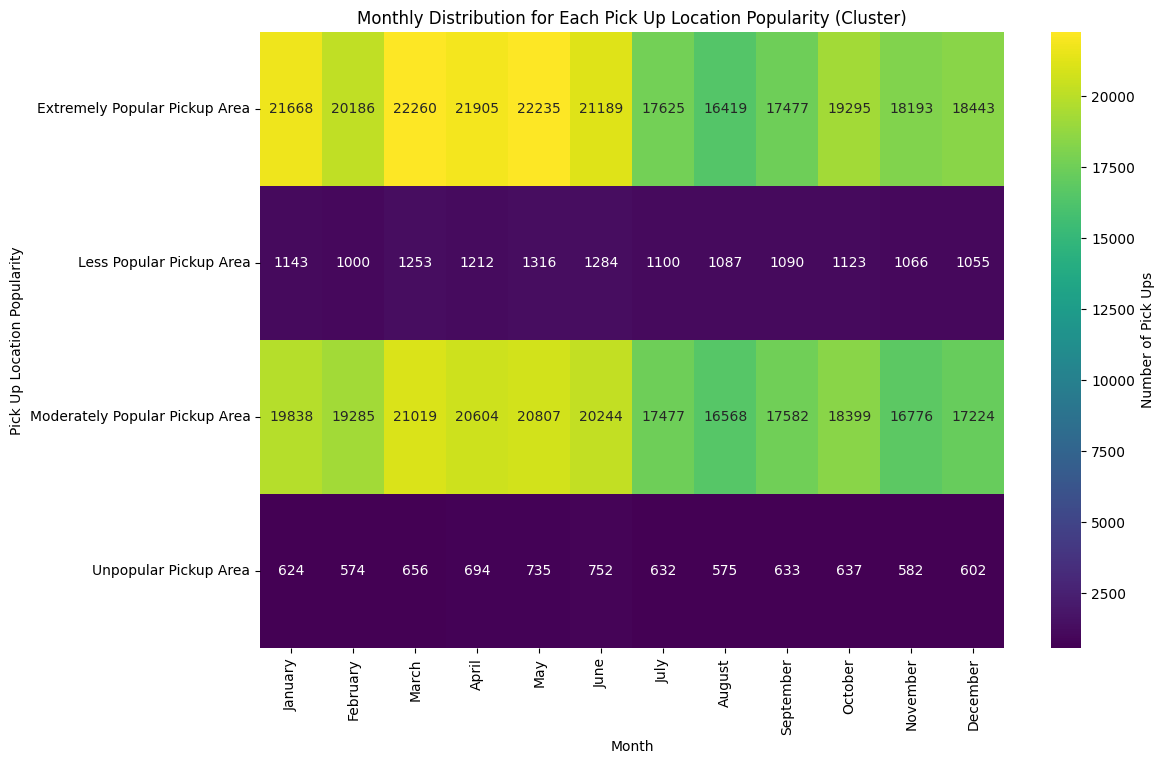

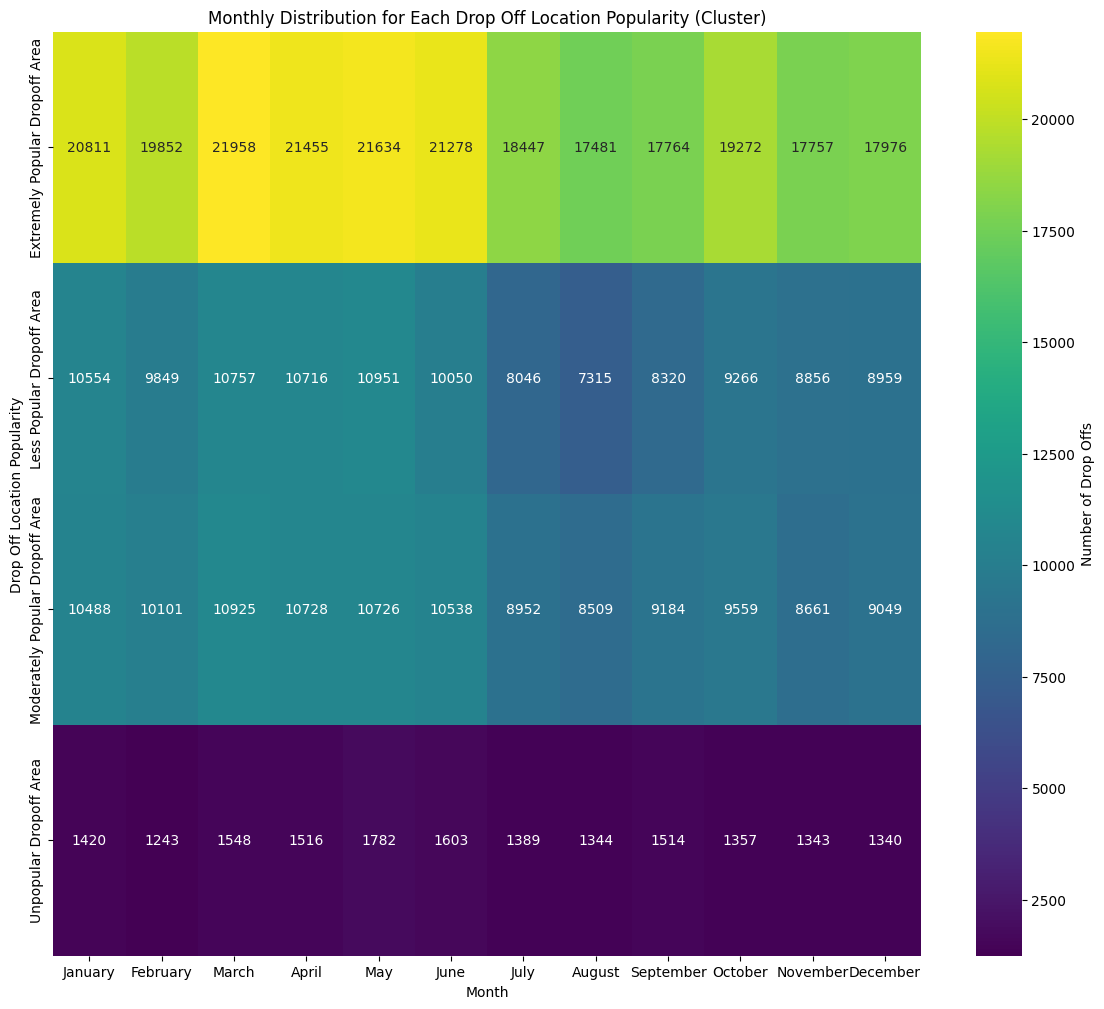

In [51]:
#Hourly Distribution for each cluster
# Create a pivot table to prepare data for the heatmap
heatmap_data = train_data.pivot_table(index='pickup_location_popularity', columns='month', aggfunc='size', fill_value=0)

# Map numerical months to month names
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Number of Pick Ups'},
            xticklabels=month_names)  # Set the x-axis labels to month names
plt.title('Monthly Distribution for Each Pick Up Location Popularity (Cluster)')
plt.xlabel('Month')
plt.ylabel('Pick Up Location Popularity')
plt.show()

#Hourly Distribution for each cluster
# Create a pivot table to prepare data for the heatmap
heatmap_data = train_data.pivot_table(index='dropoff_location_popularity', columns='month', aggfunc='size', fill_value=0)

# Map numerical months to month names
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Create the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Number of Drop Offs'},
            xticklabels=month_names)  # Set the x-axis labels to month names
plt.title('Monthly Distribution for Each Drop Off Location Popularity (Cluster)')
plt.xlabel('Month')
plt.ylabel('Drop Off Location Popularity')
plt.show()

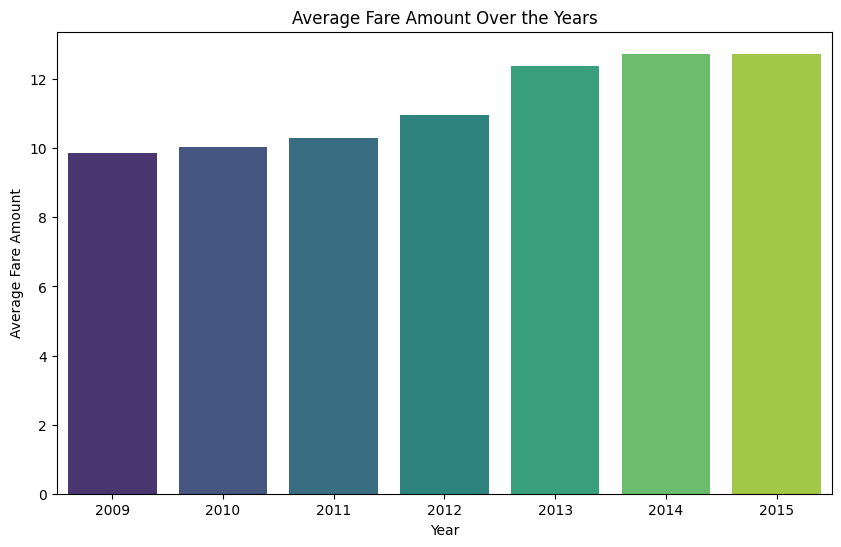

In [52]:
# Group by year and calculate the mean of 'fare_amount'
average_fare_by_year = train_data.groupby('year')['fare_amount'].mean().reset_index()

# Convert all values to numerics
average_fare_by_year['fare_amount'] = pd.to_numeric(average_fare_by_year['fare_amount'], errors='coerce')

# Plot the mean fare amount for each year
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='fare_amount', data=average_fare_by_year, palette='viridis')
plt.title('Average Fare Amount Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Fare Amount')
plt.show()

/tmp/ipykernel_19/993504323.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popularity_data['year'] = pd.to_datetime(popularity_data['pickup_datetime']).dt.year
/tmp/ipykernel_19/993504323.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popularity_data['month'] = pd.to_datetime(popularity_data['pickup_datetime']).dt.month


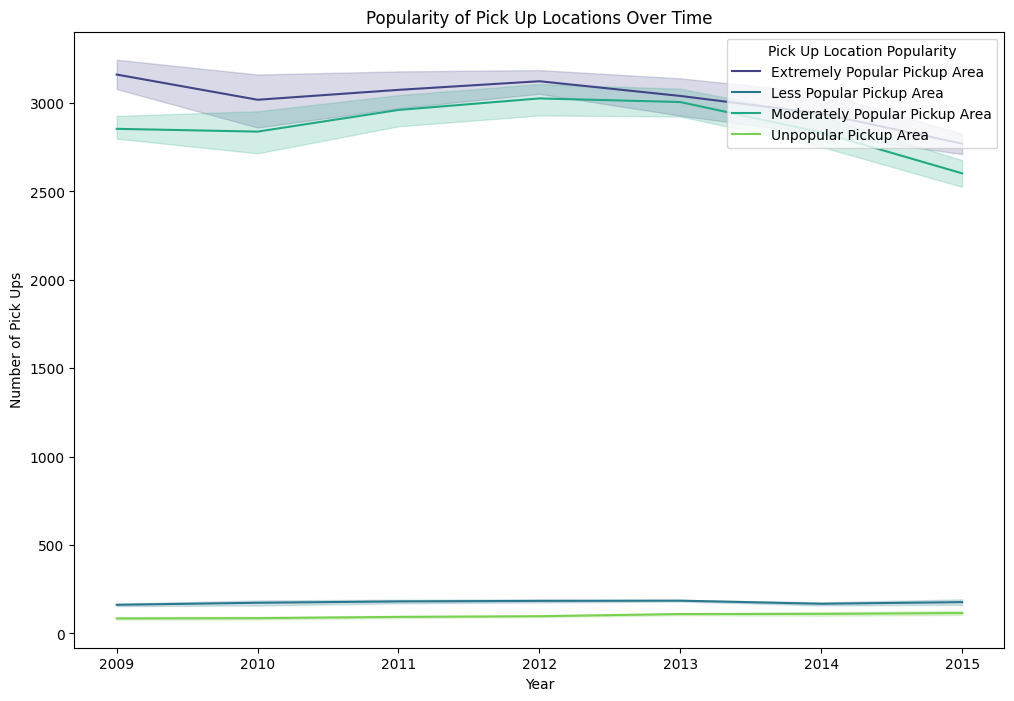

In [53]:
# Extract relevant columns
popularity_data = train_data[['pickup_location_popularity', 'pickup_datetime']]

# Extract year and month from 'pickup_datetime'
popularity_data['year'] = pd.to_datetime(popularity_data['pickup_datetime']).dt.year
popularity_data['month'] = pd.to_datetime(popularity_data['pickup_datetime']).dt.month

# Group by pickup location and time period (e.g., year, month) and count occurrences
location_popularity_over_time = popularity_data.groupby(['pickup_location_popularity', 'year', 'month']).size().reset_index(name='count')

# Plot the popularity of specific locations over time
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='count', hue='pickup_location_popularity', data=location_popularity_over_time, palette='viridis')
plt.title('Popularity of Pick Up Locations Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Pick Ups')
plt.legend(title='Pick Up Location Popularity', loc='upper right')
plt.show()

/tmp/ipykernel_19/2909220958.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popularity_data['year'] = pd.to_datetime(popularity_data['pickup_datetime']).dt.year
/tmp/ipykernel_19/2909220958.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popularity_data['month'] = pd.to_datetime(popularity_data['pickup_datetime']).dt.month


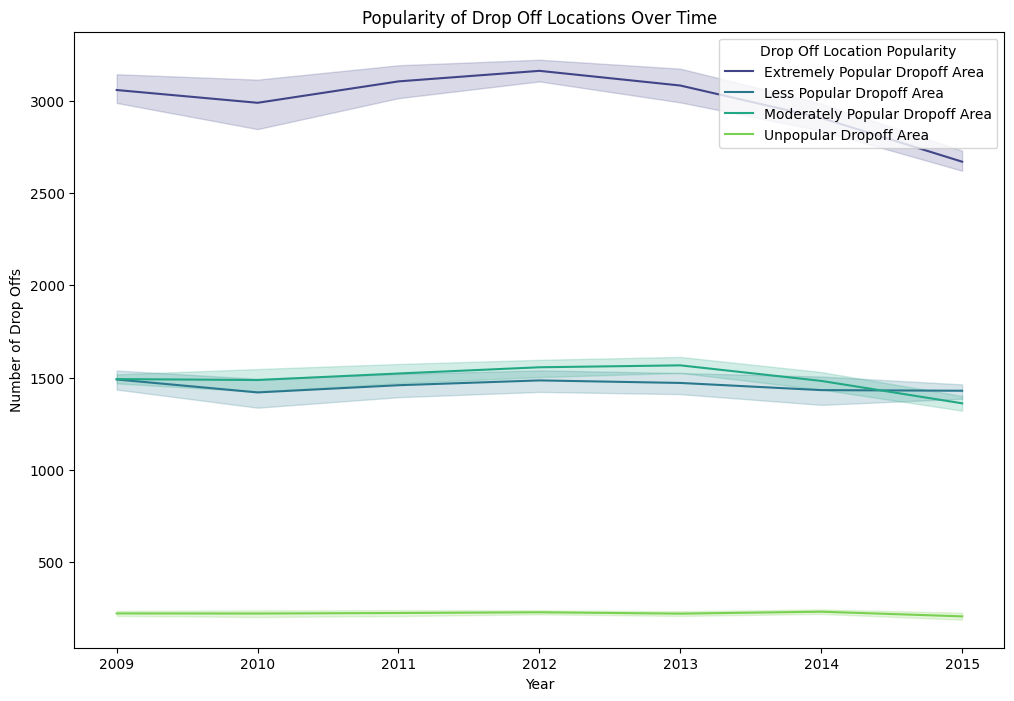

In [54]:
# Extract relevant columns
popularity_data = train_data[['dropoff_location_popularity', 'pickup_datetime']]

# Extract year and month from 'pickup_datetime'
popularity_data['year'] = pd.to_datetime(popularity_data['pickup_datetime']).dt.year
popularity_data['month'] = pd.to_datetime(popularity_data['pickup_datetime']).dt.month

# Group by Drop Off location and time period (e.g., year, month) and count occurrences
location_popularity_over_time = popularity_data.groupby(['dropoff_location_popularity', 'year', 'month']).size().reset_index(name='count')

# Plot the popularity of specific locations over time
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='count', hue='dropoff_location_popularity', data=location_popularity_over_time, palette='viridis')
plt.title('Popularity of Drop Off Locations Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Drop Offs')
plt.legend(title='Drop Off Location Popularity', loc='upper right')
plt.show()

In [55]:
train_data.head()

distance  month  hour  year         pickup_datetime day_of_week  \
0  4.363706     10     3  2009  2009/10/19 03:10:00+00      Monday   
1  1.630437      9     4  2011  2011/09/23 04:35:00+00      Friday   
2  0.294285      5    19  2011  2011/05/02 19:11:00+00      Monday   
3  1.760516      3    14  2012  2012/03/09 14:51:00+00      Friday   
4  0.073032      5     0  2012  2012/05/17 00:03:56+00    Thursday   

  pickup_date  holiday_or_not holiday_name  fare_amount  passenger_count  \
0  10/19/2009           False          NaN         25.3                3   
1   9/23/2011           False          NaN          7.7                5   
2    5/2/2011           False          NaN          9.7                1   
3    3/9/2012           False          NaN          6.9                1   
4   5/17/2012           False          NaN          5.7                1   

   pickup_cluster  dropoff_cluster      pickup_location_popularity  \
0               0                2  Moderately Popular Pickup Area   
1               0                2  Moderately Popular Pickup Area   
2               0                2  Moderately Popular Pickup Area   
3               0                2  Moderately Popular Pickup Area   
4               0                2  Moderately Popular Pickup Area   

       dropoff_location_popularity    Time of Day  
0  Moderately Popular Dropoff Area  Early Morning  
1  Moderately Popular Dropoff Area  Early Morning  
2  Moderately Popular Dropoff Area        Evening  
3  Moderately Popular Dropoff Area      Afternoon  
4  Moderately Popular Dropoff Area     Late Night

**This shows that the clustering has a good stability over time**

In [56]:
train_data.head()

distance  month  hour  year         pickup_datetime day_of_week  \
0  4.363706     10     3  2009  2009/10/19 03:10:00+00      Monday   
1  1.630437      9     4  2011  2011/09/23 04:35:00+00      Friday   
2  0.294285      5    19  2011  2011/05/02 19:11:00+00      Monday   
3  1.760516      3    14  2012  2012/03/09 14:51:00+00      Friday   
4  0.073032      5     0  2012  2012/05/17 00:03:56+00    Thursday   

  pickup_date  holiday_or_not holiday_name  fare_amount  passenger_count  \
0  10/19/2009           False          NaN         25.3                3   
1   9/23/2011           False          NaN          7.7                5   
2    5/2/2011           False          NaN          9.7                1   
3    3/9/2012           False          NaN          6.9                1   
4   5/17/2012           False          NaN          5.7                1   

   pickup_cluster  dropoff_cluster      pickup_location_popularity  \
0               0                2  Moderately Popular Pickup Area   
1               0                2  Moderately Popular Pickup Area   
2               0                2  Moderately Popular Pickup Area   
3               0                2  Moderately Popular Pickup Area   
4               0                2  Moderately Popular Pickup Area   

       dropoff_location_popularity    Time of Day  
0  Moderately Popular Dropoff Area  Early Morning  
1  Moderately Popular Dropoff Area  Early Morning  
2  Moderately Popular Dropoff Area        Evening  
3  Moderately Popular Dropoff Area      Afternoon  
4  Moderately Popular Dropoff Area     Late Night

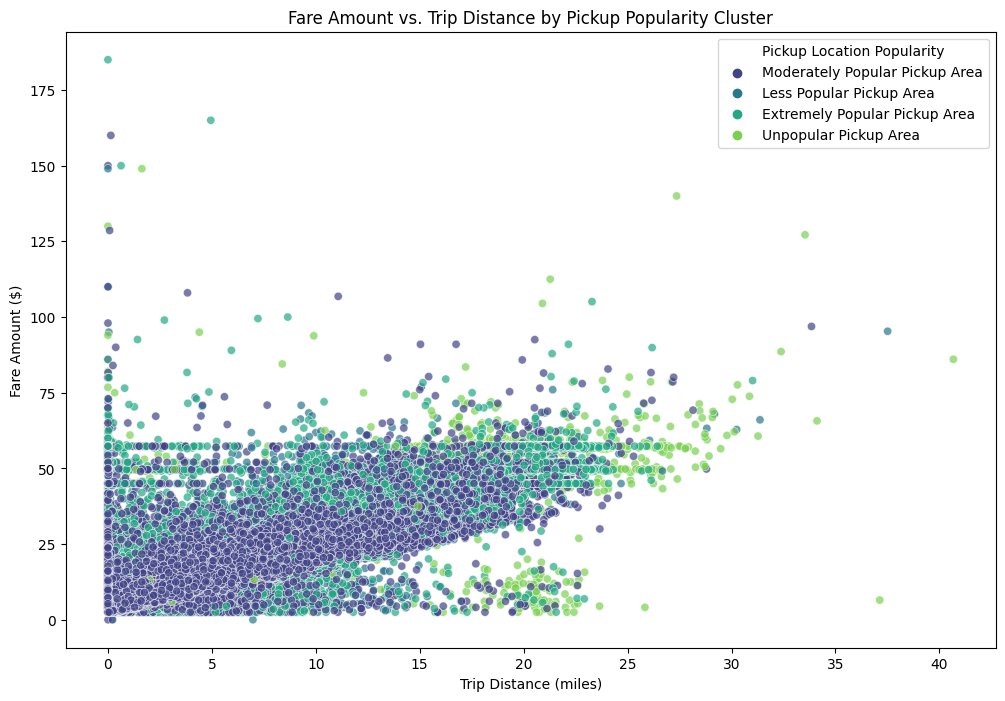

In [57]:
# Extract relevant columns
scatter_data_clustered = train_data[['fare_amount', 'distance', 'pickup_location_popularity']]

# Plot a scatter plot of fare amount vs. distance, colored by pickup popularity cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(x='distance', y='fare_amount', hue='pickup_location_popularity', data=scatter_data_clustered, palette='viridis', alpha=0.7)
plt.title('Fare Amount vs. Trip Distance by Pickup Popularity Cluster')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.legend(title='Pickup Location Popularity', loc='upper right')
plt.show()

/tmp/ipykernel_19/3096250140.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['year'] = pd.to_datetime(time_series_data['pickup_datetime']).dt.year
/tmp/ipykernel_19/3096250140.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['month'] = pd.to_datetime(time_series_data['pickup_datetime']).dt.month


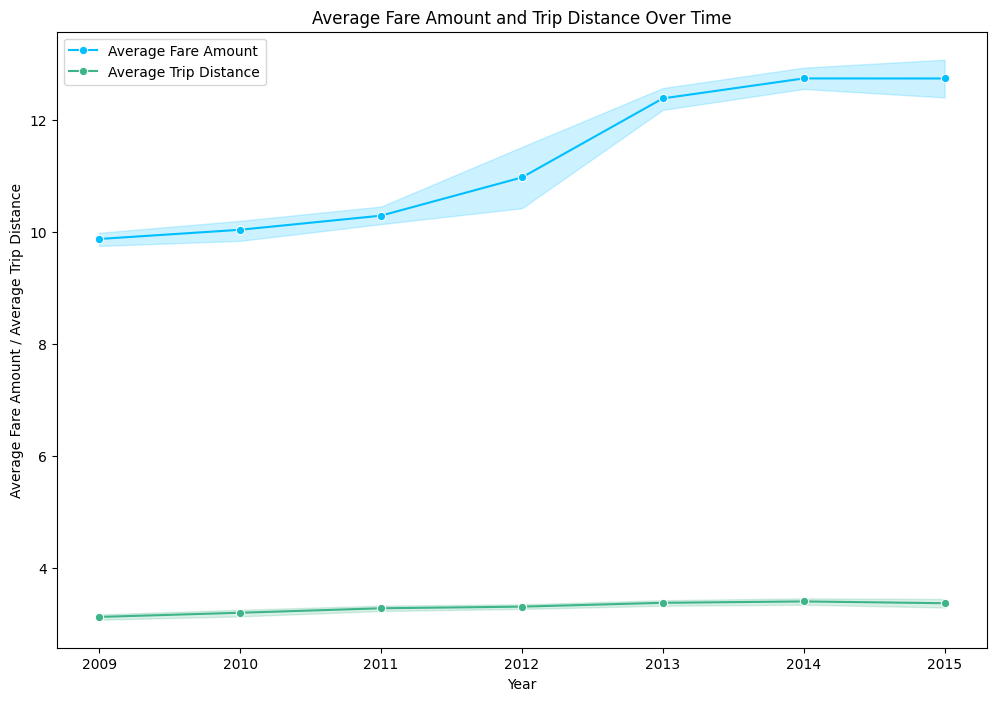

In [58]:
# Extract relevant columns
time_series_data = train_data[['fare_amount', 'distance', 'pickup_datetime']]

# Extract year and month from 'pickup_datetime'
time_series_data['year'] = pd.to_datetime(time_series_data['pickup_datetime']).dt.year
time_series_data['month'] = pd.to_datetime(time_series_data['pickup_datetime']).dt.month

# Calculate the average fare amount and average trip distance for each month
average_data_by_time = time_series_data.groupby(['year', 'month']).agg({'fare_amount': 'mean', 'distance': 'mean'}).reset_index()

# Plot a line plot for average fare amount and trip distance over time with different colors
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='fare_amount', data=average_data_by_time, label='Average Fare Amount', marker='o', color='#00BFFF')
sns.lineplot(x='year', y='distance', data=average_data_by_time, label='Average Trip Distance', marker='o', color='#3EB489')
plt.title('Average Fare Amount and Trip Distance Over Time')
plt.xlabel('Year')
plt.ylabel('Average Fare Amount / Average Trip Distance')
plt.legend()
plt.show()

/tmp/ipykernel_19/301768031.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_time_series_data['year'] = pd.to_datetime(cluster_time_series_data['pickup_datetime']).dt.year
/tmp/ipykernel_19/301768031.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_time_series_data['month'] = pd.to_datetime(cluster_time_series_data['pickup_datetime']).dt.month


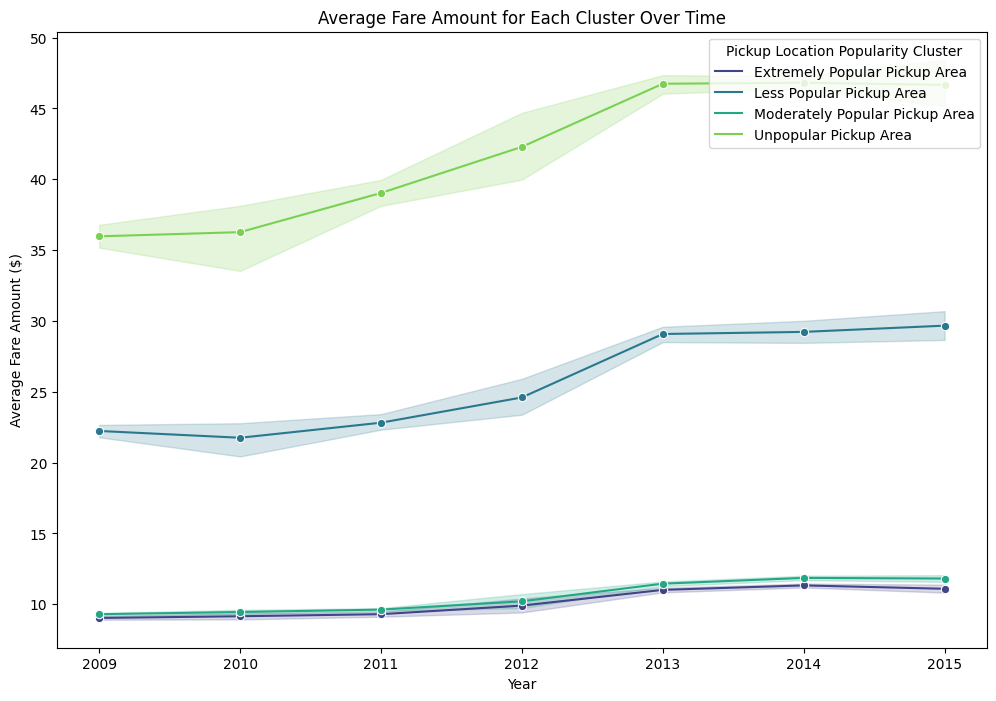

In [59]:
# Extract relevant columns
cluster_time_series_data = train_data[['fare_amount', 'pickup_datetime', 'pickup_location_popularity']]

# Extract year and month from 'pickup_datetime'
cluster_time_series_data['year'] = pd.to_datetime(cluster_time_series_data['pickup_datetime']).dt.year
cluster_time_series_data['month'] = pd.to_datetime(cluster_time_series_data['pickup_datetime']).dt.month

# Calculate the average fare amount for each cluster and month
average_data_by_cluster_time = cluster_time_series_data.groupby(['pickup_location_popularity', 'year', 'month']).agg({'fare_amount': 'mean'}).reset_index()

# Plot a line plot for average fare amount for each cluster over time
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='fare_amount', hue='pickup_location_popularity', data=average_data_by_cluster_time, marker='o', palette='viridis')
plt.title('Average Fare Amount for Each Cluster Over Time')
plt.xlabel('Year')
plt.ylabel('Average Fare Amount ($)')
plt.legend(title='Pickup Location Popularity Cluster', loc='upper right')
plt.show()

In [60]:
data_coordinates.head()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude
0        -74.102257        40.620580         -74.113213         40.582228
1        -74.089848        40.609495         -74.073173         40.602097
2        -74.109358        40.557018         -74.109812         40.559642
3        -74.089560        40.613708         -74.106953         40.622447
4        -74.106327        40.601547         -74.105547         40.601831

In [61]:
# Create a folium map centered around the average pickup location
average_pickup_location = data_coordinates[['pickup_latitude', 'pickup_longitude']].mean().values
pickup_map = folium.Map(location=average_pickup_location, zoom_start=12)

# Add a HeatMap for pickup locations
HeatMap(data_coordinates[['pickup_latitude', 'pickup_longitude']].values).add_to(pickup_map)
pickup_map.save('pickup_heatmap.html')
# Specify the path to the saved HTML file
html_file_path = 'pickup_heatmap.html'

# Display the map in the notebook
IFrame(html_file_path, width=700, height=500)

In [62]:
average_dropoff_location = data_coordinates[['dropoff_latitude', 'dropoff_longitude']].mean().values
dropoff_map = folium.Map(location=average_dropoff_location, zoom_start=12)

# Add a HeatMap for dropoff locations
HeatMap(data_coordinates[['dropoff_latitude', 'dropoff_longitude']].values).add_to(dropoff_map)

# Save the map as an HTML file
dropoff_map.save('dropoff_heatmap.html')

# Specify the path to the saved HTML file
html_file_path = 'dropoff_heatmap.html'

# Display the map in the notebook using an IFrame
IFrame(html_file_path, width=700, height=500)

# Modeling Using Random Forest

In [63]:
"""
from sklearn.model_selection import train_test_split

# Features for the model (adjust based on your dataset)
features = ['distance', 'hour', 'year', 'passenger_count', 'pickup_cluster']  # Add or modify features as needed
target = 'pickup_location_popularity'

# Split the data into features (X) and target variable (y)
X = train_data[features]
y = train_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
"""

'\nfrom sklearn.model_selection import train_test_split\n\n# Features for the model (adjust based on your dataset)\nfeatures = [\'distance\', \'hour\', \'year\', \'passenger_count\', \'pickup_cluster\']  # Add or modify features as needed\ntarget = \'pickup_location_popularity\'\n\n# Split the data into features (X) and target variable (y)\nX = train_data[features]\ny = train_data[target]\n\n# Split the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Print the shapes of the training and testing sets\nprint("Training set shape:", X_train.shape, y_train.shape)\nprint("Testing set shape:", X_test.shape, y_test.shape)\n'

In [64]:
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Additional metrics
print('\nClassification Report:')
print(classification_report(y_test, predictions))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predictions))
"""

"\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score, classification_report, confusion_matrix\n\n# Create a Random Forest classifier\nrf_model = RandomForestClassifier(random_state=42)\n\n# Train the model on the training set\nrf_model.fit(X_train, y_train)\n\n# Make predictions on the testing set\npredictions = rf_model.predict(X_test)\n\n# Evaluate the model\naccuracy = accuracy_score(y_test, predictions)\nprint(f'Accuracy: {accuracy}')\n\n# Additional metrics\nprint('\nClassification Report:')\nprint(classification_report(y_test, predictions))\n\nprint('\nConfusion Matrix:')\nprint(confusion_matrix(y_test, predictions))\n"

In [65]:
data_coordinates.head()

pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude
0        -74.102257        40.620580         -74.113213         40.582228
1        -74.089848        40.609495         -74.073173         40.602097
2        -74.109358        40.557018         -74.109812         40.559642
3        -74.089560        40.613708         -74.106953         40.622447
4        -74.106327        40.601547         -74.105547         40.601831

In [66]:
dataset = pd.concat([train_data, data_coordinates], axis=1)

In [67]:
dataset.head()

distance  month  hour  year         pickup_datetime day_of_week  \
0  4.363706     10     3  2009  2009/10/19 03:10:00+00      Monday   
1  1.630437      9     4  2011  2011/09/23 04:35:00+00      Friday   
2  0.294285      5    19  2011  2011/05/02 19:11:00+00      Monday   
3  1.760516      3    14  2012  2012/03/09 14:51:00+00      Friday   
4  0.073032      5     0  2012  2012/05/17 00:03:56+00    Thursday   

  pickup_date  holiday_or_not holiday_name  fare_amount  passenger_count  \
0  10/19/2009           False          NaN         25.3                3   
1   9/23/2011           False          NaN          7.7                5   
2    5/2/2011           False          NaN          9.7                1   
3    3/9/2012           False          NaN          6.9                1   
4   5/17/2012           False          NaN          5.7                1   

   pickup_cluster  dropoff_cluster      pickup_location_popularity  \
0               0                2  Moderately Popular Pickup Area   
1               0                2  Moderately Popular Pickup Area   
2               0                2  Moderately Popular Pickup Area   
3               0                2  Moderately Popular Pickup Area   
4               0                2  Moderately Popular Pickup Area   

       dropoff_location_popularity    Time of Day  pickup_longitude  \
0  Moderately Popular Dropoff Area  Early Morning        -74.102257   
1  Moderately Popular Dropoff Area  Early Morning        -74.089848   
2  Moderately Popular Dropoff Area        Evening        -74.109358   
3  Moderately Popular Dropoff Area      Afternoon        -74.089560   
4  Moderately Popular Dropoff Area     Late Night        -74.106327   

   pickup_latitude  dropoff_longitude  dropoff_latitude  
0        40.620580         -74.113213         40.582228  
1        40.609495         -74.073173         40.602097  
2        40.557018         -74.109812         40.559642  
3        40.613708         -74.106953         40.622447  
4        40.601547         -74.105547         40.601831

In [68]:
"""
from sklearn.model_selection import cross_val_score

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
"""

'\nfrom sklearn.model_selection import cross_val_score\n\n# Create a Random Forest classifier\nrf_model = RandomForestClassifier(random_state=42)\n\n# Perform cross-validation\ncv_scores = cross_val_score(rf_model, X, y, cv=5, scoring=\'accuracy\')\n\n# Print the cross-validation scores\nprint("Cross-Validation Scores:", cv_scores)\nprint("Mean Accuracy:", cv_scores.mean())\n'

In [69]:

# Save the updated DataFrame to a CSV file
output_file_path = '/kaggle/working/dataset.csv'
dataset.to_csv(output_file_path, index=False)


In [70]:
"""
# Check if there are rows with Lat and Long equal to 0
rows_with_zero_coords = dataset[(dataset['pickup_latitude'] == 0) & (dataset['pickup_longitude'] == 0)]

# Print or further process the rows with zero coordinates
if not rows_with_zero_coords.empty:
    print("Rows with lat and long equal to 0:")
    print(rows_with_zero_coords)
else:
    print("No rows with lat and long equal to 0.")
    
"""

'\n# Check if there are rows with Lat and Long equal to 0\nrows_with_zero_coords = dataset[(dataset[\'pickup_latitude\'] == 0) & (dataset[\'pickup_longitude\'] == 0)]\n\n# Print or further process the rows with zero coordinates\nif not rows_with_zero_coords.empty:\n    print("Rows with lat and long equal to 0:")\n    print(rows_with_zero_coords)\nelse:\n    print("No rows with lat and long equal to 0.")\n    \n'

In [71]:
"""
# Check if there are rows with Lat and Long equal to 0
rows_with_zero_coords = dataset[(dataset['dropoff_latitude'] == 0) & (dataset['dropoff_longitude'] == 0)]

# Print or further process the rows with zero coordinates
if not rows_with_zero_coords.empty:
    print("Rows with lat and long equal to 0:")
    print(rows_with_zero_coords)
else:
    print("No rows with lat and long equal to 0.")
"""

'\n# Check if there are rows with Lat and Long equal to 0\nrows_with_zero_coords = dataset[(dataset[\'dropoff_latitude\'] == 0) & (dataset[\'dropoff_longitude\'] == 0)]\n\n# Print or further process the rows with zero coordinates\nif not rows_with_zero_coords.empty:\n    print("Rows with lat and long equal to 0:")\n    print(rows_with_zero_coords)\nelse:\n    print("No rows with lat and long equal to 0.")\n'

In [72]:
"""
# Display count before cleaning
print("Count before cleaning:", len(dataset))
"""

'\n# Display count before cleaning\nprint("Count before cleaning:", len(dataset))\n'

In [73]:
"""
# Define criteria for removing points (e.g., remove points with both lat and long as 0)
dataset = dataset[(dataset['pickup_latitude'] != 0) & (dataset['pickup_longitude'] != 0)]

# Display count after cleaning
print("Count after cleaning:", len(dataset))
"""

'\n# Define criteria for removing points (e.g., remove points with both lat and long as 0)\ndataset = dataset[(dataset[\'pickup_latitude\'] != 0) & (dataset[\'pickup_longitude\'] != 0)]\n\n# Display count after cleaning\nprint("Count after cleaning:", len(dataset))\n'

In [74]:
unpopular_dropoff_count = (train_data['dropoff_location_popularity'] == "Unpopular Dropoff Area").sum()
print("Number of rows with 'Unpopular Dropoff Area':", unpopular_dropoff_count)


Number of rows with 'Unpopular Dropoff Area': 17399


In [75]:
unpopular_pickup_count = (train_data['pickup_location_popularity'] == "Unpopular Pickup Area").sum()
print("Number of rows with 'Unpopular Pickup Area':", unpopular_pickup_count)

Number of rows with 'Unpopular Pickup Area': 7696
